# PART - 1 : Clustering: Digital Ads Data

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [246]:
df=pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

## Basic Analysis

In [3]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [4]:
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [5]:
df.shape

(23066, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [8]:
df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [9]:
df.duplicated().sum()

0

## Treating Missing values in CTR,CPM,CPC

In [247]:
#creating user defined function
def calculate_cpc(x):
    spend=df.Spend
    clicks=df.Clicks
    cpc = (spend/clicks)
    return cpc

def calculate_ctr(x):
    impressions = df.Impressions
    clicks=df.Clicks
    ctr = (clicks/(impressions)*100)
    return ctr

def calculate_cpm(x):
    spend=df.Spend
    impressions = df.Impressions
    cpm = (spend/impressions)*1000
    return cpm


In [248]:
#calling the function to impute
df['CPC']= df[['CPC']].apply(lambda x:calculate_cpc(x))
df['CTR']= df[['CTR']].apply(lambda x:calculate_ctr(x))
df['CPM']= df[['CPM']].apply(lambda x:calculate_cpm(x))


In [249]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

## Checking Outliers

In [250]:
num = []
cat = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
            num.append(i)

In [251]:
data = df[num]
data

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
0              300        250    75000                   1806   
1              300        250    75000                   1780   
2              300        250    75000                   2727   
3              300        250    75000                   2430   
4              300        250    75000                   1218   
...            ...        ...      ...                    ...   
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue         CTR  \
0                  325          323       1   0.00  0.35   0.0000    0.309598   
1                  285          285       1   0.00  0.35   0.0000    0.350877   
2                  356          355       1   0.00  0.35   0.0000    0.281690   
3                  497          495       1   0.00  0.35   0.0000    0.202020   
4                  242          242       1   0.00  0.35   0.0000    0.413223   
...                ...          ...     ...    ...   ...      ...         ...   
23061                1            1       1   0.07  0.35   0.0455  100.000000   
23062                2            2       1   0.04  0.35   0.0260   50.000000   
23063                1            1       1   0.05  0.35   0.0325  100.000000   
23064                1            1       1   0.07  0.35   0.0455  100.000000   
23065                2            2       1   0.09  0.35   0.0585   50.000000   

        CPM   CPC  
0       0.0  0.00  
1       0.0  0.00  
2       0.0  0.00  
3       0.0  0.00  
4       0.0  0.00  
...     ...   ...  
23061  70.0  0.07  
23062  20.0  0.04  
23063  50.0  0.05  
23064  70.0  0.07  
23065  45.0  0.09  

[23066 rows x 13 columns]

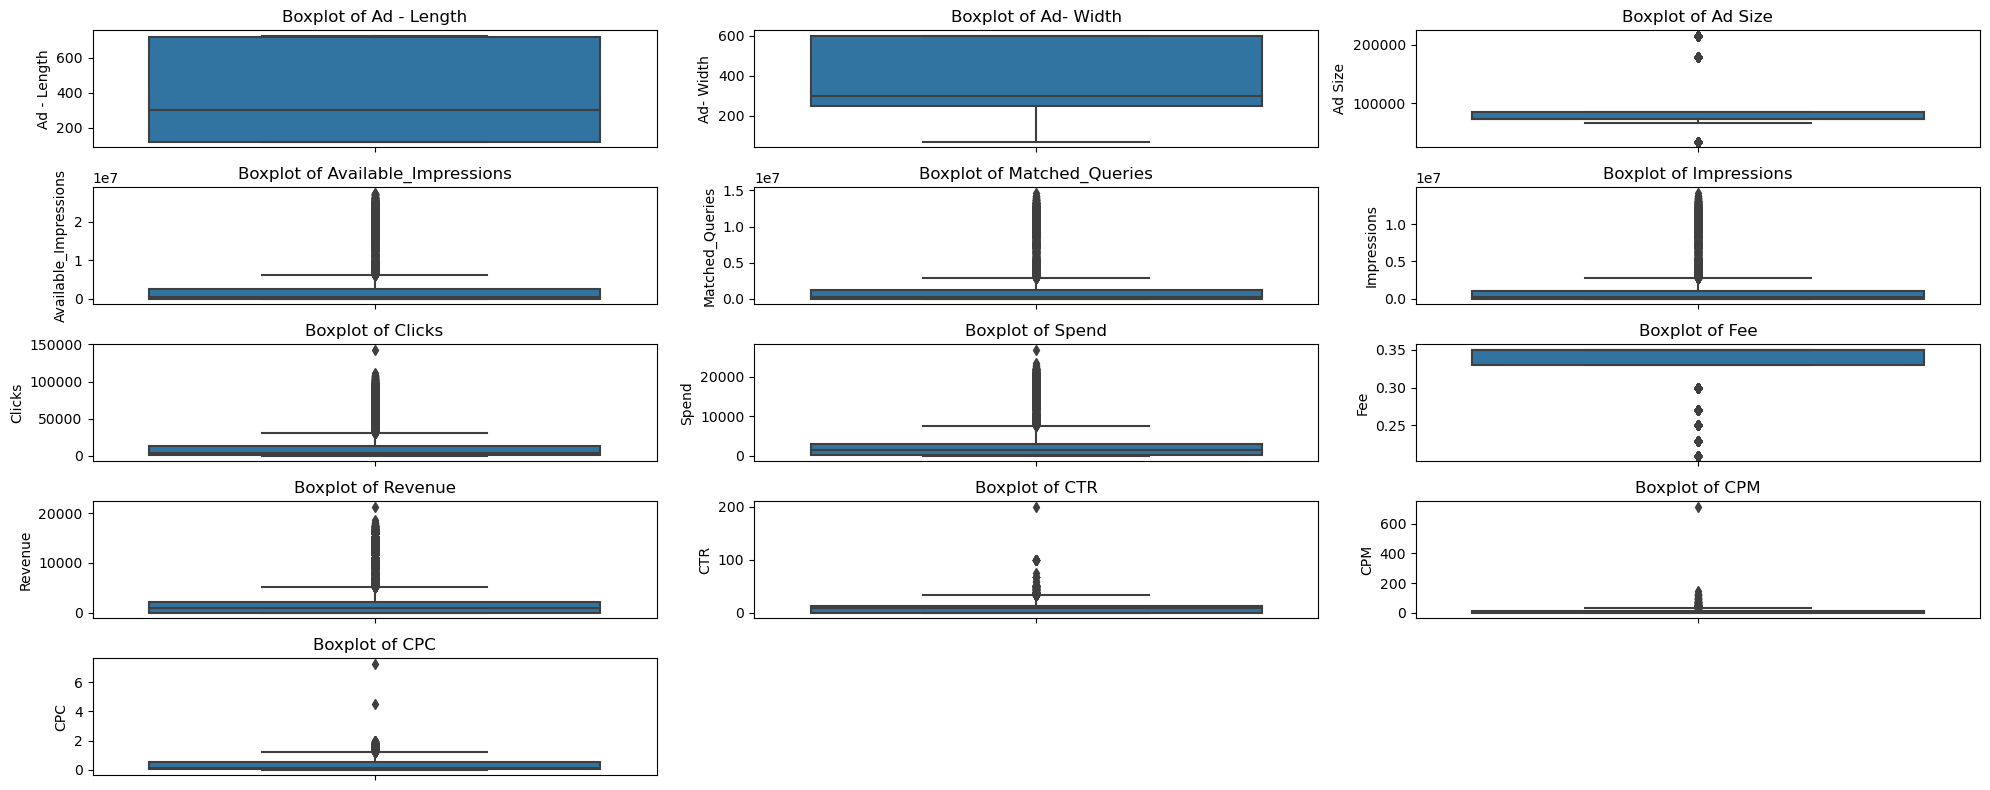

In [252]:
plt.figure(figsize = (20,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Treating Outliers

In [253]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [254]:
for i in feature_list:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])

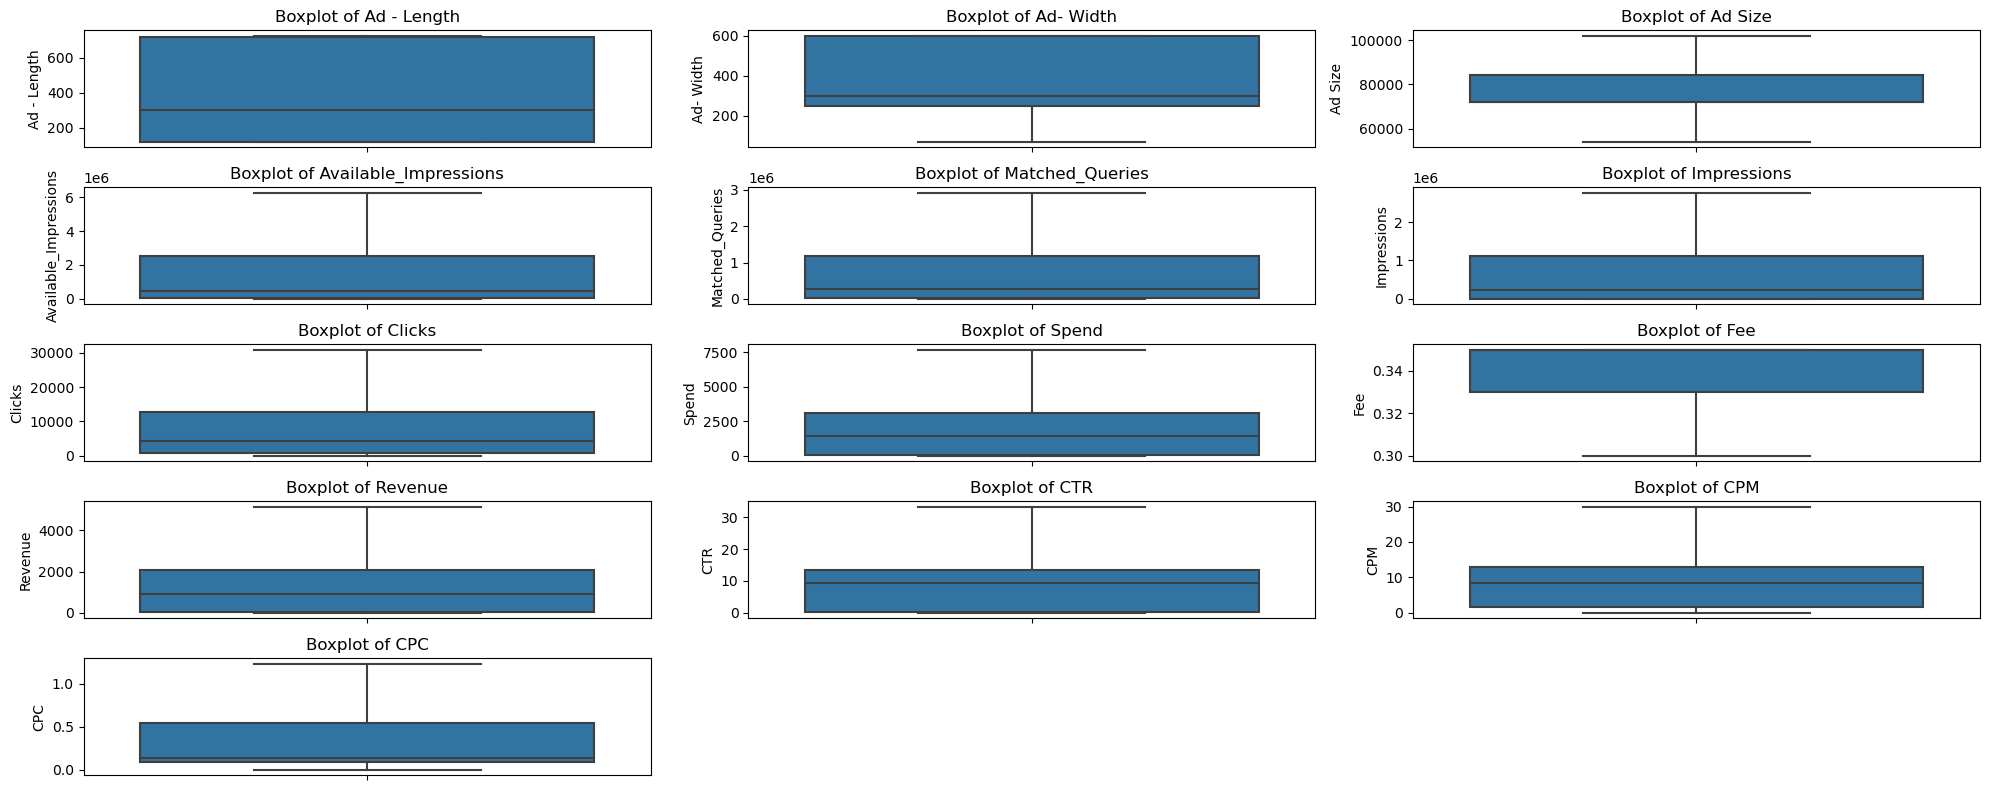

In [255]:
plt.figure(figsize = (20,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Univariate Analysis

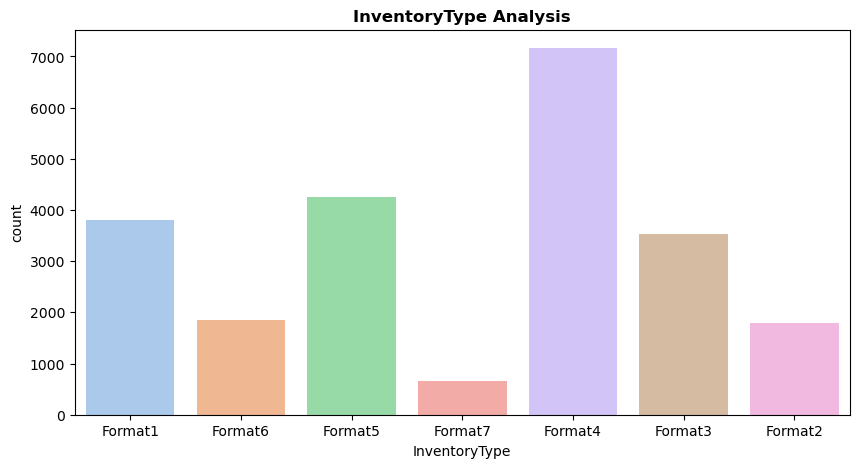

In [19]:
#Categorical Variable
plt.figure(figsize=(10,5))
sns.countplot(x='InventoryType',data=df,palette='pastel');
plt.title('InventoryType Analysis',fontsize='large', loc='center',fontweight='bold');

<Figure size 6000x6000 with 0 Axes>

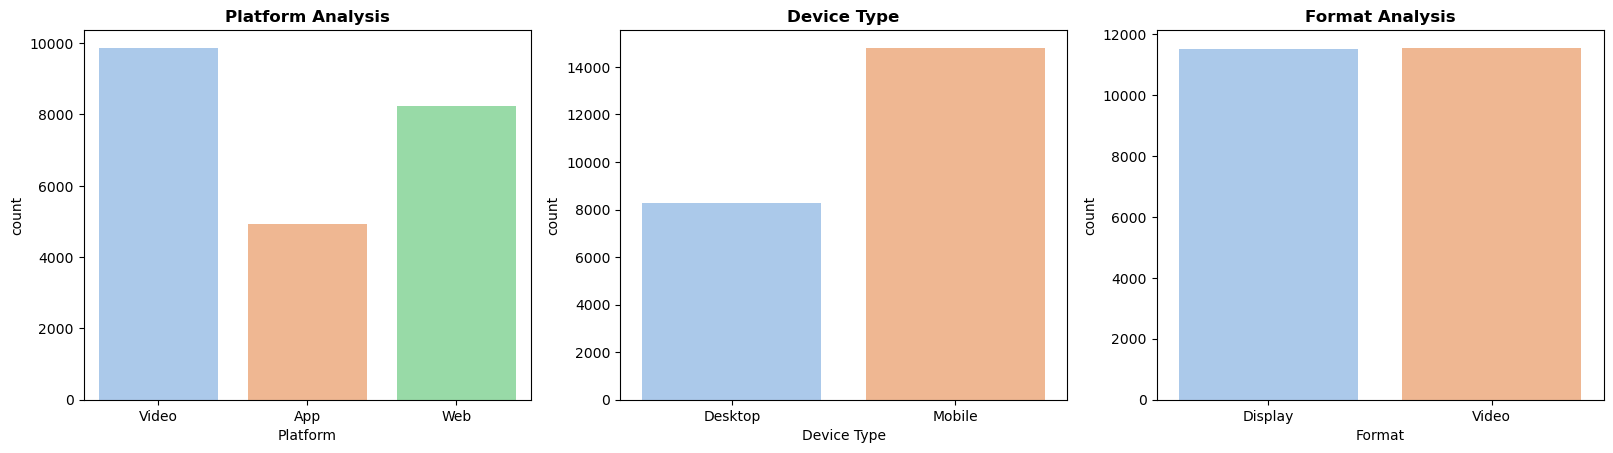

In [20]:
#Categorical Variable
plt.figure(figsize=(60,60))
fig, ax =plt.subplots(1,3)

sns.countplot(x='Platform',data=df,palette='pastel',ax=ax[0]);
sns.countplot(x='Device Type',data=df,palette='pastel',ax=ax[1]);
sns.countplot(x='Format',data=df,palette='pastel',ax=ax[2]);
ax[0].set_title('Platform Analysis',fontsize='large', loc='center',fontweight='bold');
ax[1].set_title('Device Type',fontsize='large', loc='center',fontweight='bold');
ax[2].set_title('Format Analysis',fontsize='large', loc='center',fontweight='bold');

plt.subplots_adjust(right = 2.5) 
plt.show()

In [21]:
#Categorical Variable
tab1 = pd.crosstab(df["Ad Type"],"count")          
tab1

col_0     count
Ad Type        
Inter217   1655
Inter218   1645
Inter219   1650
Inter220   1644
Inter221   1650
Inter222   1649
Inter223   1654
Inter224   1658
Inter225   1643
Inter226   1640
Inter227   1647
Inter228   1639
Inter229   1648
inter230   1644

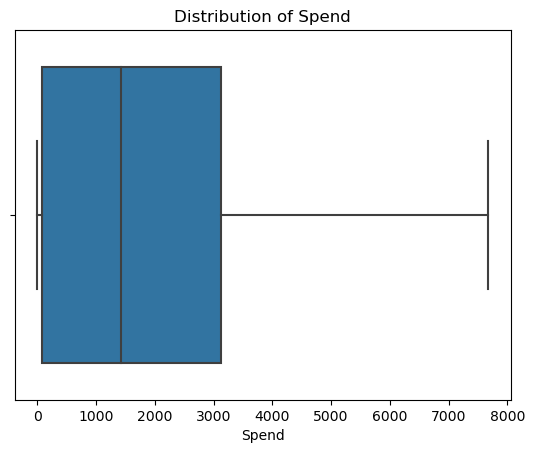

In [22]:
#Numerical Variable
sns.boxplot(x='Spend',data=data).set(title='Distribution of Spend');

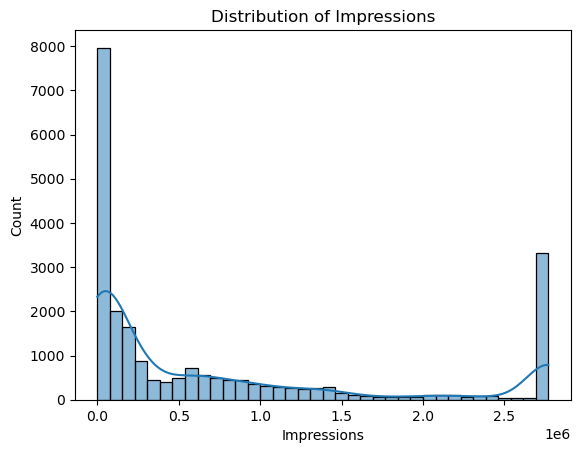

In [262]:
sns.histplot(data=data,x='Impressions',kde=True).set(title='Distribution of Impressions');

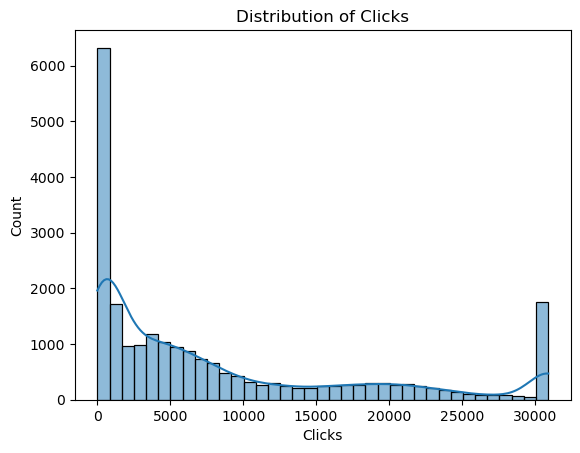

In [261]:
sns.histplot(data=data,x='Clicks',kde=True).set(title='Distribution of Clicks');

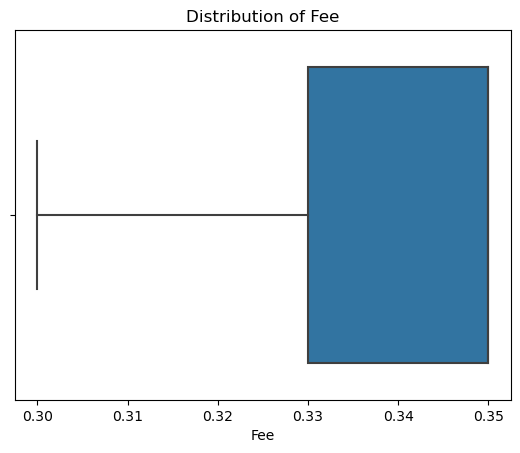

In [25]:
sns.boxplot(x='Fee',data=data).set(title='Distribution of Fee');

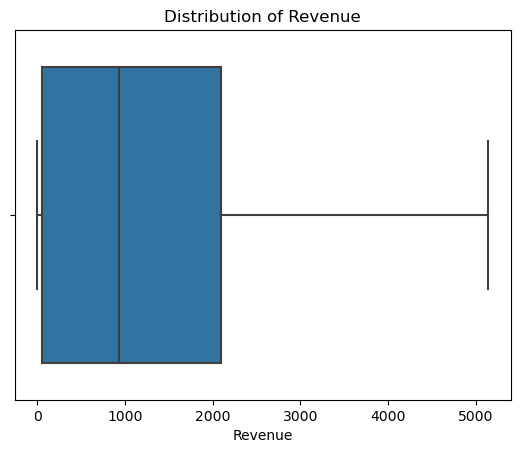

In [26]:
sns.boxplot(x='Revenue',data=data).set(title='Distribution of Revenue');

<Figure size 6000x6000 with 0 Axes>

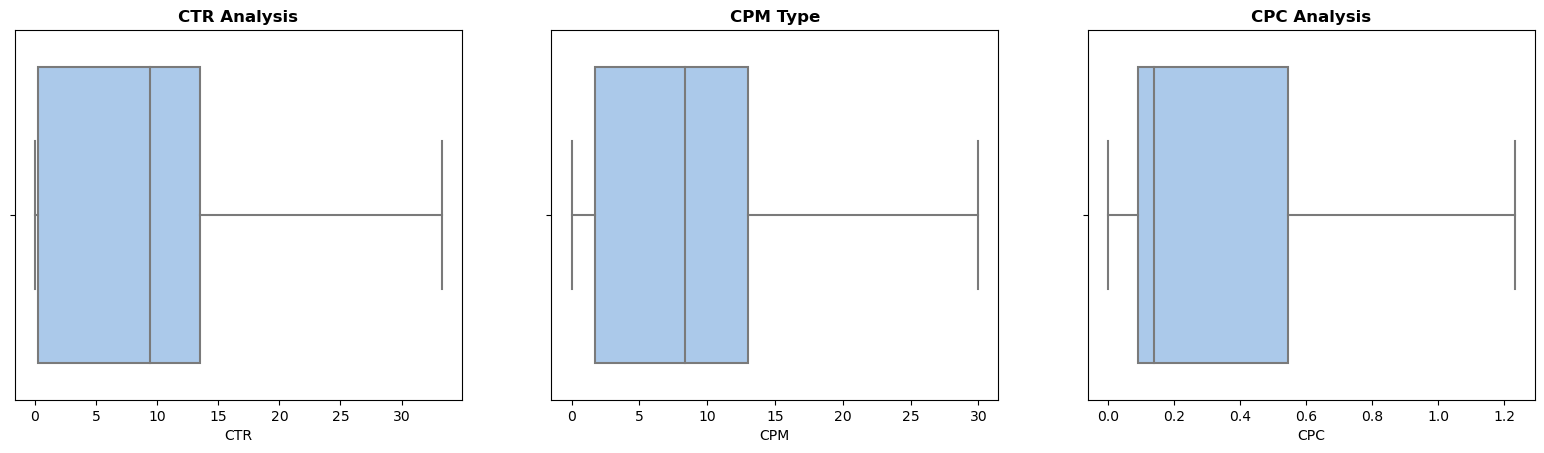

In [27]:
#Numerical Variable
plt.figure(figsize=(60,60))
fig, ax =plt.subplots(1,3)

sns.boxplot(x='CTR',data=data,palette='pastel',ax=ax[0]);
sns.boxplot(x='CPM',data=data,palette='pastel',ax=ax[1]);
sns.boxplot(x='CPC',data=data,palette='pastel',ax=ax[2]);
ax[0].set_title('CTR Analysis',fontsize='large', loc='center',fontweight='bold');
ax[1].set_title('CPM Type',fontsize='large', loc='center',fontweight='bold');
ax[2].set_title('CPC Analysis',fontsize='large', loc='center',fontweight='bold');

plt.subplots_adjust(right = 2.5) 
plt.show()

## Bivariate Analysis

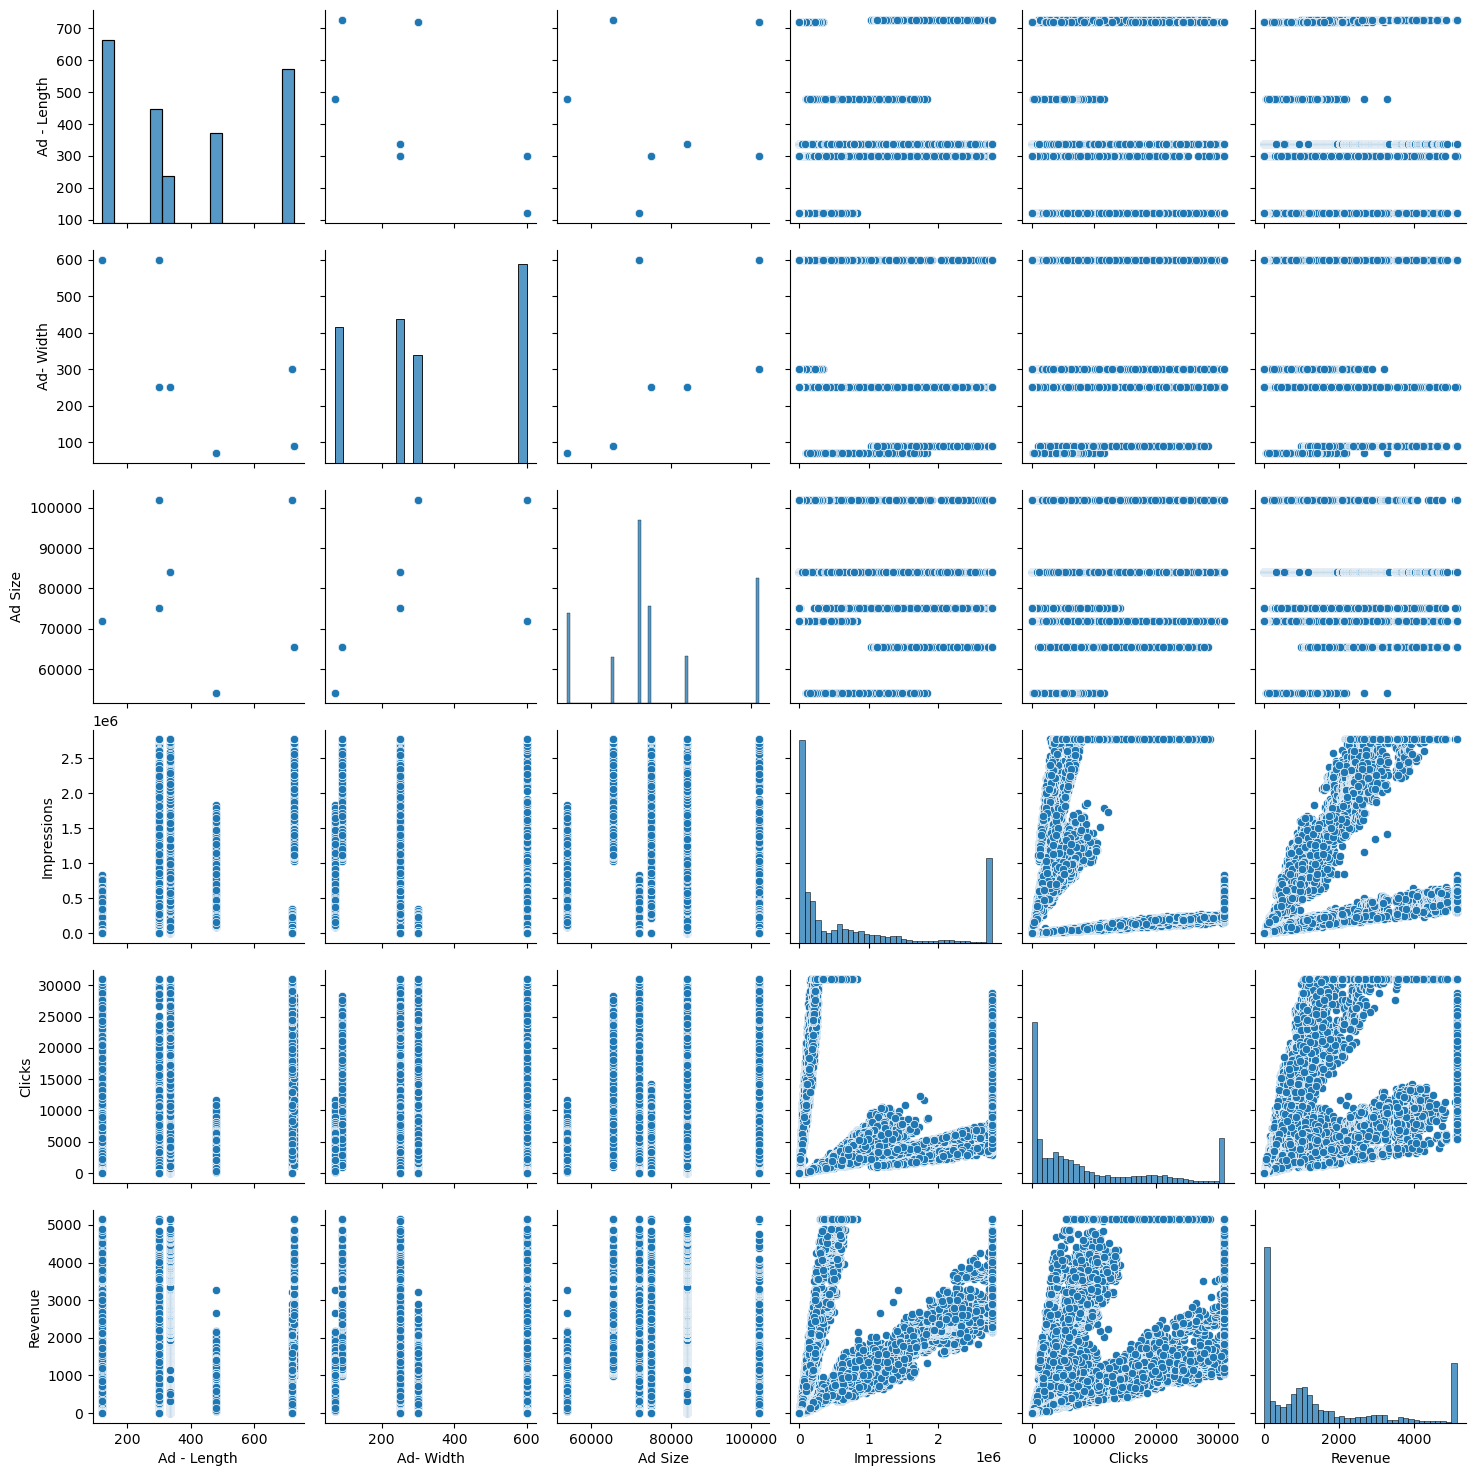

In [28]:
#Relation between numerical variable
sns.pairplot(data=data[['Ad - Length','Ad- Width','Ad Size','Impressions','Clicks','Revenue']]);

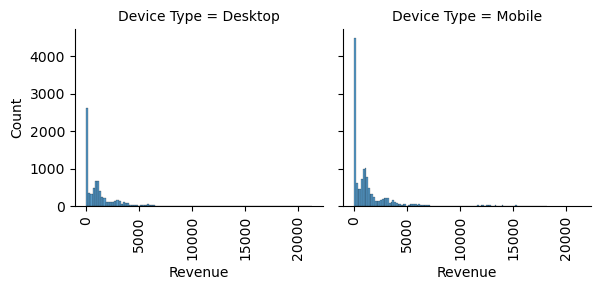

In [264]:
#Categorical vs Numerical variable
g=sns.FacetGrid(df,col='Device Type')
g.map(sns.histplot,'Revenue').add_legend()
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

<Axes: xlabel='Platform', ylabel='Spend'>

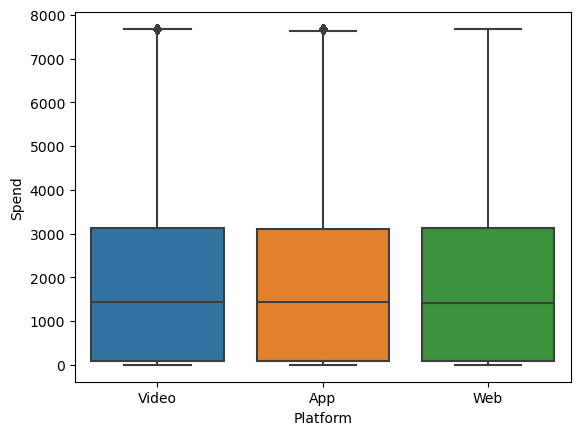

In [266]:
sns.boxplot(x=df['Platform'], y=data['Spend'], data=data)

## Z-Score scaling

In [239]:
from scipy.stats import zscore
data_scaled=data.apply(zscore)

In [240]:
data_scaled.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.958836 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.953835 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.962218 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.971871 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.946281 -1.194498   

        CPC  
0 -1.042561  
1 -1.042561  
2 -1.042561  
3 -1.042561  
4 -1.042561

In [224]:
data_scaled.describe()

Ad - Length     Ad- Width       Ad Size  Available_Impressions  \
count  2.306600e+04  2.306600e+04  2.306600e+04           2.306600e+04   
mean   1.281478e-16 -1.182903e-16  3.055833e-16           9.857525e-18   
std    1.000022e+00  1.000022e+00  1.000022e+00           1.000022e+00   
min   -1.134891e+00 -1.319110e+00 -1.467840e+00          -7.561823e-01   
25%   -1.134891e+00 -4.327968e-01 -2.975645e-01          -7.403406e-01   
50%   -3.644957e-01 -1.865987e-01 -2.975645e-01          -5.285774e-01   
75%    1.433093e+00  1.290590e+00  4.826195e-01           4.330590e-01   
max    1.467332e+00  1.290590e+00  1.652896e+00           2.193158e+00   

       Matched_Queries   Impressions        Clicks         Spend  \
count     2.306600e+04  23066.000000  2.306600e+04  2.306600e+04   
mean      1.971505e-17      0.000000 -1.182903e-16 -9.857525e-17   
std       1.000022e+00      1.000022  1.000022e+00  1.000022e+00   
min      -7.792648e-01     -0.768806 -8.674882e-01 -8.931702e-01   
25%      -7.614468e-01     -0.760655 -7.934379e-01 -8.580464e-01   
50%      -5.277221e-01     -0.538975 -4.054310e-01 -3.055230e-01   
75%       3.714976e-01      0.366051  4.686290e-01  3.939323e-01   
max       2.070914e+00      2.056111  2.361729e+00  2.271900e+00   

                Fee       Revenue           CTR           CPM           CPC  
count  2.306600e+04  2.306600e+04  2.306600e+04  2.306600e+04  2.306600e+04  
mean   1.143473e-15  3.943010e-17  1.380054e-16  2.464381e-17  3.943010e-17  
std    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  
min   -2.222416e+00 -8.800933e-01 -9.950306e-01 -1.194498e+00 -1.042561e+00  
25%   -5.675316e-01 -8.464745e-01 -9.642269e-01 -9.403026e-01 -7.590912e-01  
50%    5.357244e-01 -3.176070e-01  1.415239e-01  2.214626e-02 -6.023707e-01  
75%    5.357244e-01  3.898027e-01  6.357869e-01  7.009055e-01  6.829874e-01  
max    5.357244e-01  2.244218e+00  3.035808e+00  3.162718e+00  2.846105e+00

## Hierarchial Clustering

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [96]:
wardlink = linkage(data_scaled, method = 'ward', metric = 'euclidean')

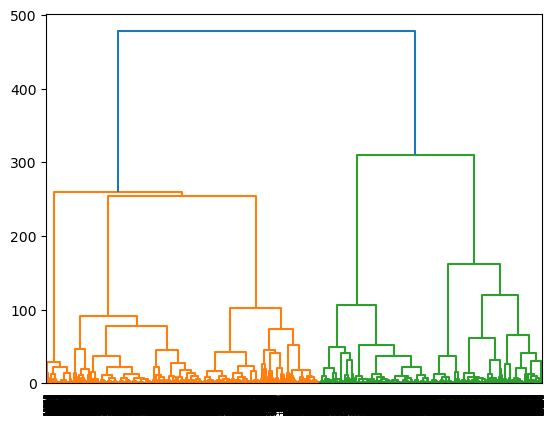

In [225]:
dend = dendrogram(wardlink)

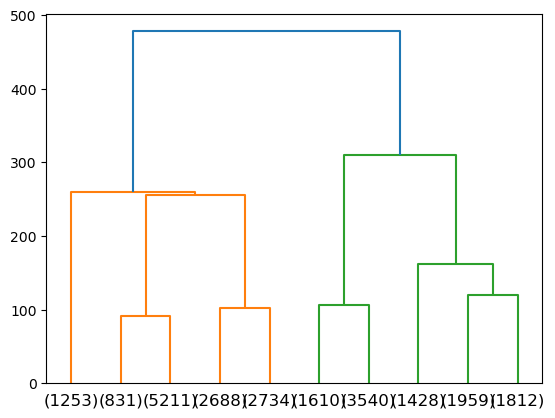

In [97]:
dendro = dendrogram(wardlink, truncate_mode = 'lastp', p = 10)

In [98]:
from scipy.cluster.hierarchy import fcluster

In [99]:
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [100]:
df['clusters'] = clusters
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  \
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.00   
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.00   
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.00   
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.00   
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.00   
...            ...     ...    ...   ...      ...         ...   ...   ...   
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  0.09   

       clusters  
0             4  
1             4  
2             4  
3             4  
4             4  
...         ...  
23061         3  
23062         3  
23063         3  
23064         2  
23065         3  

[23066 rows x 20 columns]

## K-means Clustering

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [103]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

183349.1020288607

In [104]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

130878.34240367355

In [105]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

95573.87582842818

In [26]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scaled)
k_means.inertia_

61539.18919785389

In [27]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data_scaled)
k_means.inertia_

51676.89230709962

In [106]:
wss =[]

In [107]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)

In [108]:
wss

[299858.00000000006,
 183349.1020288607,
 130878.34788742856,
 95573.8329226824,
 61539.18998404851,
 51676.89681600459,
 44598.262116139085,
 39597.84594043495,
 36061.729559138075,
 32998.39641381086]

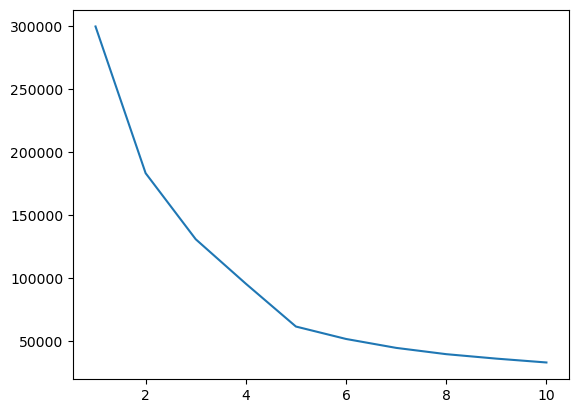

In [109]:
plt.plot(range(1,11), wss)

In [110]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scaled)
labels = k_means.labels_

In [111]:
df["Clus_kmeans"] = labels
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0        Video     Desktop  Display                   1806  ...          323   
1          App      Mobile    Video                   1780  ...          285   
2        Video     Desktop  Display                   2727  ...          355   
3        Video      Mobile    Video                   2430  ...          495   
4          Web     Desktop    Video                   1218  ...          242   
...        ...         ...      ...                    ...  ...          ...   
23061      Web      Mobile    Video                      1  ...            1   
23062      Web     Desktop    Video                      3  ...            2   
23063      App      Mobile    Video                      2  ...            1   
23064    Video      Mobile    Video                      7  ...            1   
23065      App      Mobile    Video                      2  ...            2   

       Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  clusters  \
0           1   0.00  0.35   0.0000    0.309598   0.0  0.00         4   
1           1   0.00  0.35   0.0000    0.350877   0.0  0.00         4   
2           1   0.00  0.35   0.0000    0.281690   0.0  0.00         4   
3           1   0.00  0.35   0.0000    0.202020   0.0  0.00         4   
4           1   0.00  0.35   0.0000    0.413223   0.0  0.00         4   
...       ...    ...   ...      ...         ...   ...   ...       ...   
23061       1   0.07  0.35   0.0455  100.000000  70.0  0.07         3   
23062       1   0.04  0.35   0.0260   50.000000  20.0  0.04         3   
23063       1   0.05  0.35   0.0325  100.000000  50.0  0.05         3   
23064       1   0.07  0.35   0.0455  100.000000  70.0  0.07         2   
23065       1   0.09  0.35   0.0585   50.000000  45.0  0.09         3   

       Clus_kmeans  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
23061            1  
23062            1  
23063            1  
23064            3  
23065            1  

[23066 rows x 21 columns]

## Silhouette Scores 

In [112]:
silhouette_score(data_scaled,labels)

0.5240956940501831

In [113]:
sil_width = silhouette_samples(data_scaled,labels)
sil_width

array([0.14263751, 0.14200708, 0.14309186, ..., 0.12833615, 0.38595215,
       0.12840723])

In [114]:
df["sil_width"] = sil_width
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  ...  Clicks  \
0        Video     Desktop  Display                   1806  ...       1   
1          App      Mobile    Video                   1780  ...       1   
2        Video     Desktop  Display                   2727  ...       1   
3        Video      Mobile    Video                   2430  ...       1   
4          Web     Desktop    Video                   1218  ...       1   
...        ...         ...      ...                    ...  ...     ...   
23061      Web      Mobile    Video                      1  ...       1   
23062      Web     Desktop    Video                      3  ...       1   
23063      App      Mobile    Video                      2  ...       1   
23064    Video      Mobile    Video                      7  ...       1   
23065      App      Mobile    Video                      2  ...       1   

       Spend   Fee  Revenue         CTR   CPM   CPC  clusters  Clus_kmeans  \
0       0.00  0.35   0.0000    0.309598   0.0  0.00         4            0   
1       0.00  0.35   0.0000    0.350877   0.0  0.00         4            0   
2       0.00  0.35   0.0000    0.281690   0.0  0.00         4            0   
3       0.00  0.35   0.0000    0.202020   0.0  0.00         4            0   
4       0.00  0.35   0.0000    0.413223   0.0  0.00         4            0   
...      ...   ...      ...         ...   ...   ...       ...          ...   
23061   0.07  0.35   0.0455  100.000000  70.0  0.07         3            1   
23062   0.04  0.35   0.0260   50.000000  20.0  0.04         3            1   
23063   0.05  0.35   0.0325  100.000000  50.0  0.05         3            1   
23064   0.07  0.35   0.0455  100.000000  70.0  0.07         2            3   
23065   0.09  0.35   0.0585   50.000000  45.0  0.09         3            1   

       sil_width  
0       0.142638  
1       0.142007  
2       0.143092  
3       0.144273  
4       0.141021  
...          ...  
23061   0.128446  
23062   0.196818  
23063   0.128336  
23064   0.385952  
23065   0.128407  

[23066 rows x 22 columns]

## Cluster Profiling

In [132]:
clust_profile=df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)
clust_profile

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
0              300        250    75000                   1806   
1              300        250    75000                   1780   
2              300        250    75000                   2727   
3              300        250    75000                   2430   
4              300        250    75000                   1218   
...            ...        ...      ...                    ...   
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue         CTR  \
0                  325          323       1   0.00  0.35   0.0000    0.309598   
1                  285          285       1   0.00  0.35   0.0000    0.350877   
2                  356          355       1   0.00  0.35   0.0000    0.281690   
3                  497          495       1   0.00  0.35   0.0000    0.202020   
4                  242          242       1   0.00  0.35   0.0000    0.413223   
...                ...          ...     ...    ...   ...      ...         ...   
23061                1            1       1   0.07  0.35   0.0455  100.000000   
23062                2            2       1   0.04  0.35   0.0260   50.000000   
23063                1            1       1   0.05  0.35   0.0325  100.000000   
23064                1            1       1   0.07  0.35   0.0455  100.000000   
23065                2            2       1   0.09  0.35   0.0585   50.000000   

        CPM   CPC  clusters  Clus_kmeans  sil_width  
0       0.0  0.00         4            0   0.142638  
1       0.0  0.00         4            0   0.142007  
2       0.0  0.00         4            0   0.143092  
3       0.0  0.00         4            0   0.144273  
4       0.0  0.00         4            0   0.141021  
...     ...   ...       ...          ...        ...  
23061  70.0  0.07         3            1   0.128446  
23062  20.0  0.04         3            1   0.196818  
23063  50.0  0.05         3            1   0.128336  
23064  70.0  0.07         2            3   0.385952  
23065  45.0  0.09         3            1   0.128407  

[23066 rows x 16 columns]

In [157]:
cluster_profile=clust_profile.groupby(['Clus_kmeans']).mean()
cluster_profile['freq']=clust_profile.Clus_kmeans.value_counts().sort_index()
cluster_profile


Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
Clus_kmeans                                                                  
0             421.696255  152.001594   55008.841434           1.810314e+06   
1             683.825492  303.785287  206160.821215           2.513465e+05   
2             465.781944  199.148989   75176.566354           1.038821e+07   
3             143.280809  572.103004   76597.026364           3.209356e+04   
4             141.454782  572.446324   75614.834092           8.063284e+05   

             Matched_Queries   Impressions        Clicks        Spend  \
Clus_kmeans                                                             
0               8.642623e+05  8.262209e+05   3263.131952  1500.090563   
1               1.375509e+05  1.167714e+05  14406.540205  1252.285569   
2               5.625808e+06  5.447310e+06  11245.754810  8646.647997   
3               1.962406e+04  1.349204e+04   1914.448804   209.162609   
4               5.668641e+05  4.781485e+05  65315.176318  6990.360898   

                  Fee      Revenue        CTR        CPM       CPC  clusters  \
Clus_kmeans                                                                    
0            0.349264   977.424163   0.404392   1.788731  0.544614  4.182470   
1            0.349538   815.541831  13.857220  12.098200  0.090012  3.001069   
2            0.290439  6373.659814   0.217242   1.573280  0.760929  5.000000   
3            0.349988   135.993379  16.037897  14.693481  0.102794  2.115573   
4            0.288302  5017.538285  13.752664  15.385753  0.111918  1.202342   

             sil_width  freq  
Clus_kmeans                   
0             0.486421  6275  
1             0.524970  4676  
2             0.489297  4054  
3             0.544845  6524  
4             0.678959  1537

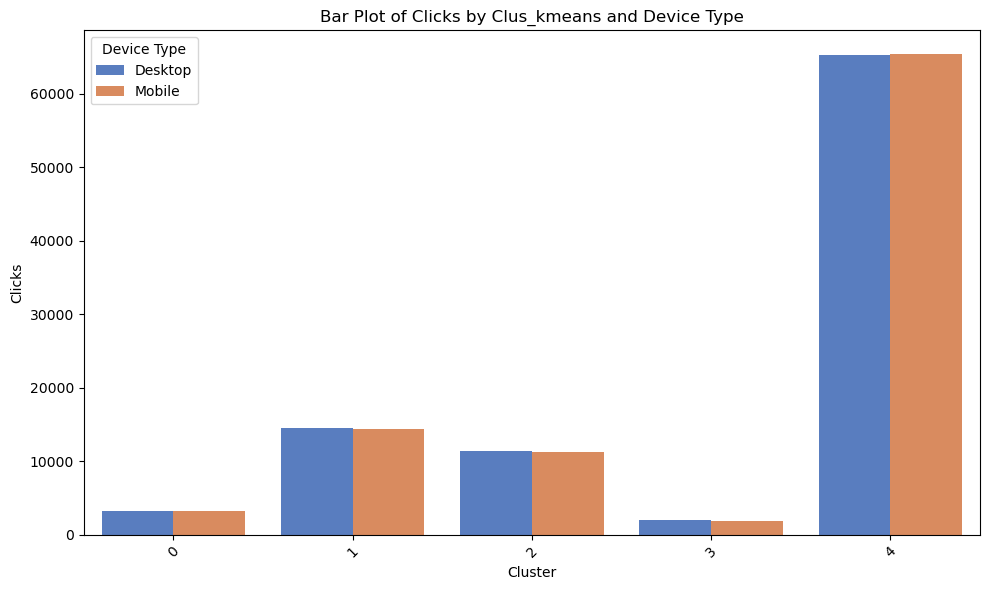

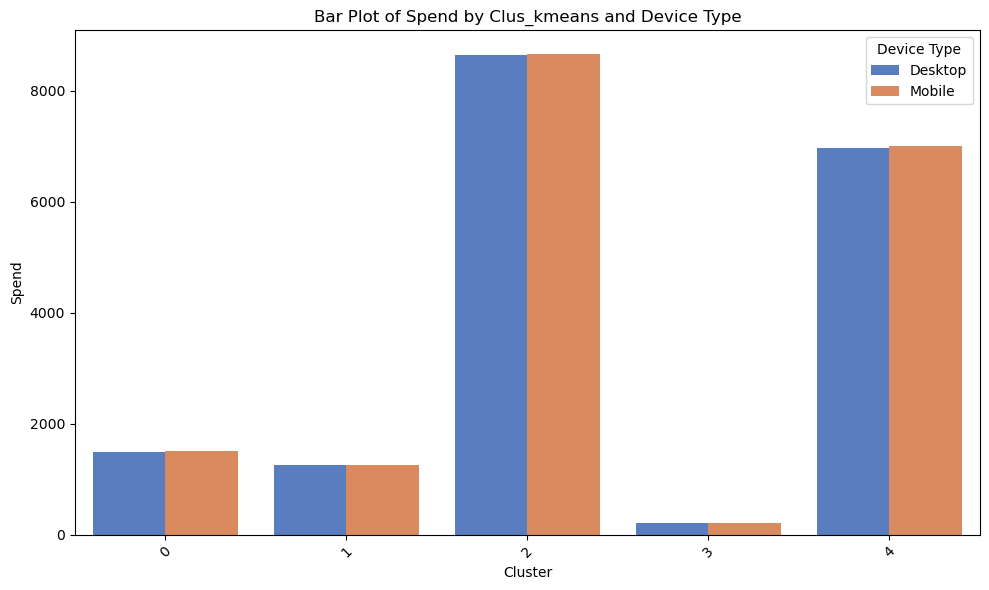

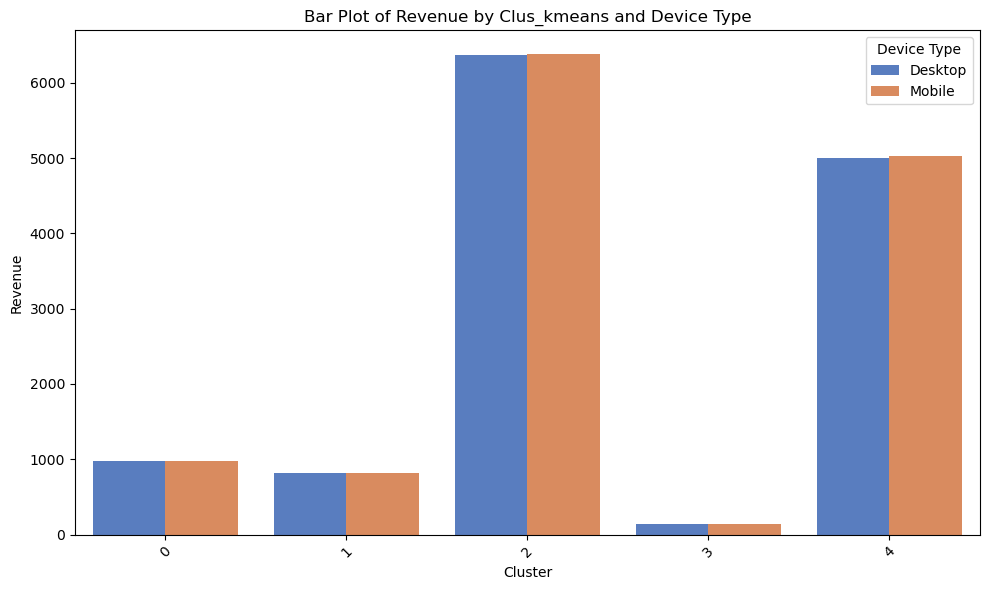

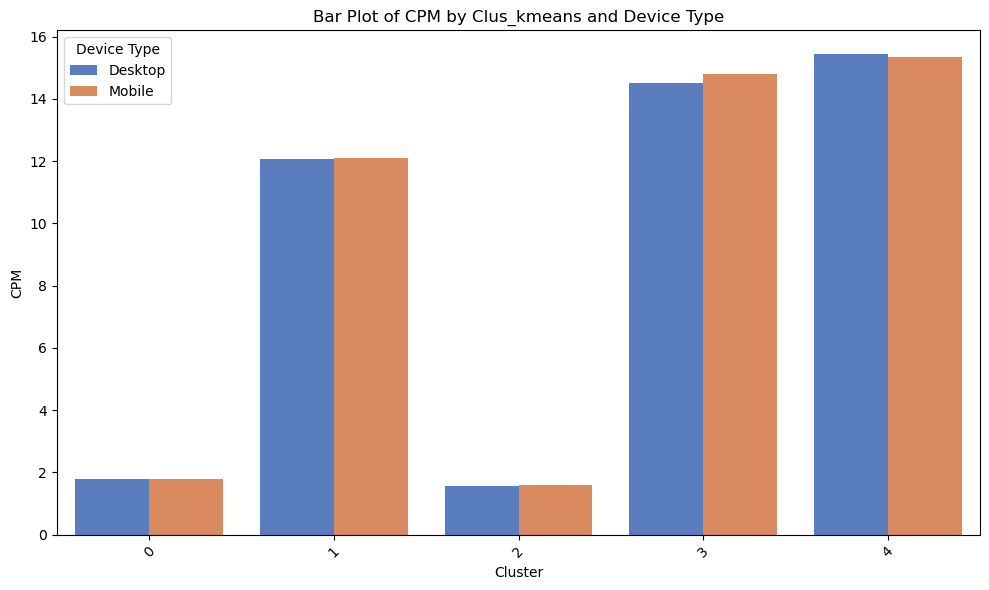

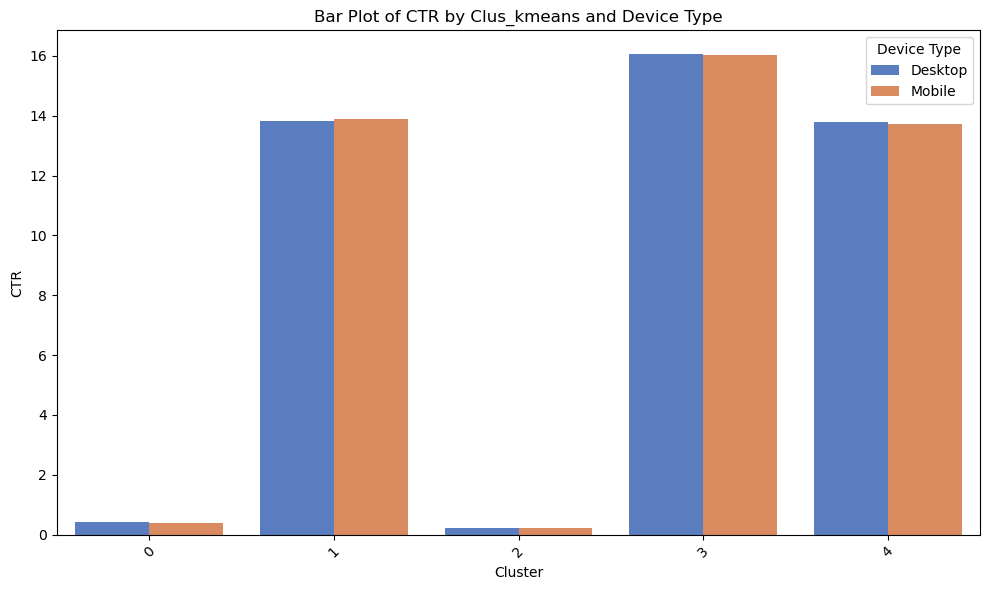

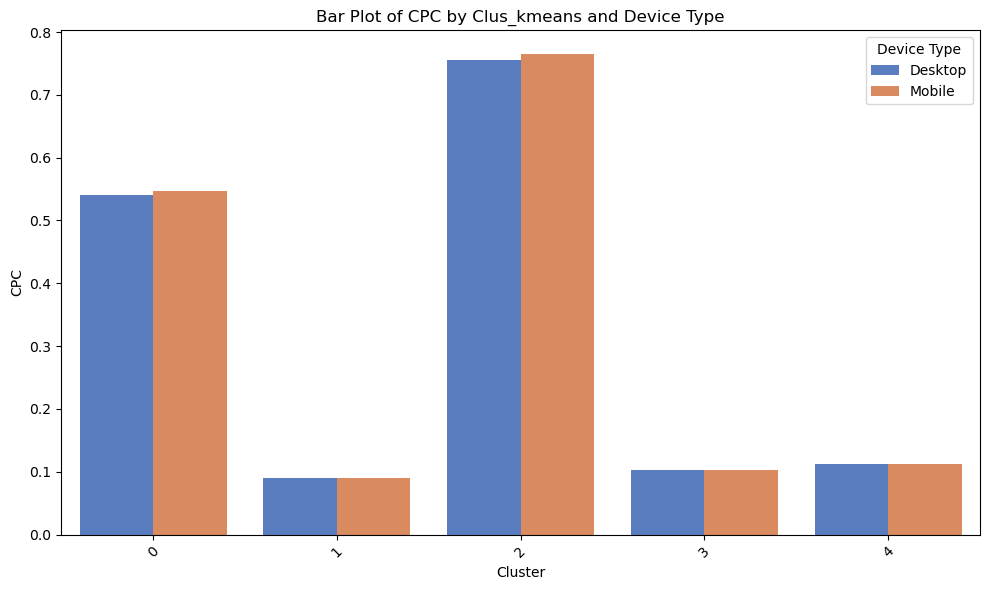

In [223]:
grouped_data = df.groupby(['Clus_kmeans', 'Device Type']).agg({
    'Clicks': 'mean',
    'Spend': 'mean',
    'Revenue': 'mean',
    'CPM': 'mean',
    'CTR': 'mean',
    'CPC': 'mean'
}).reset_index()

metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x='Clus_kmeans', y=metric, hue='Device Type', palette='muted')
    plt.title(f'Bar Plot of {metric} by Clus_kmeans and Device Type')
    plt.ylabel(metric)
    plt.xlabel('Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# PART-2 : PCA Census

In [51]:
df1=pd.read_excel('PCA+India+Data_Census.xlsx')

## Basic Analysis

In [4]:
df1.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [71]:
df1.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [72]:
df1.shape

(640, 61)

In [73]:
df1.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1392.973438    2757.050000     250.889062     558.098438   
std    ...    1489.707052    2788.776676     453.336594    1117.642748   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    9875.000000   21611.000000    5775.000000   17153.000000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      560.690625    1293.431250      71.379688     200.742188   
std       762.578991    1585.377936     107.897627     309.740854   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      6116.000000   13714.000000     895.000000    3354.000000   

        NON_WORK_M    NON_WORK_F  
count   640.000000    640.000000  
mean    510.014063    704.778125  
std     610.603187    910.209225  
min       0.000000      5.000000  
25%     161.000000    220.500000  
50%     326.000000    464.500000  
75%     604.500000    853.500000  
max    6456.000000  10533.000000  

[8 rows x 59 columns]

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [75]:
df1.duplicated().sum()

0

In [76]:
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

## EDA

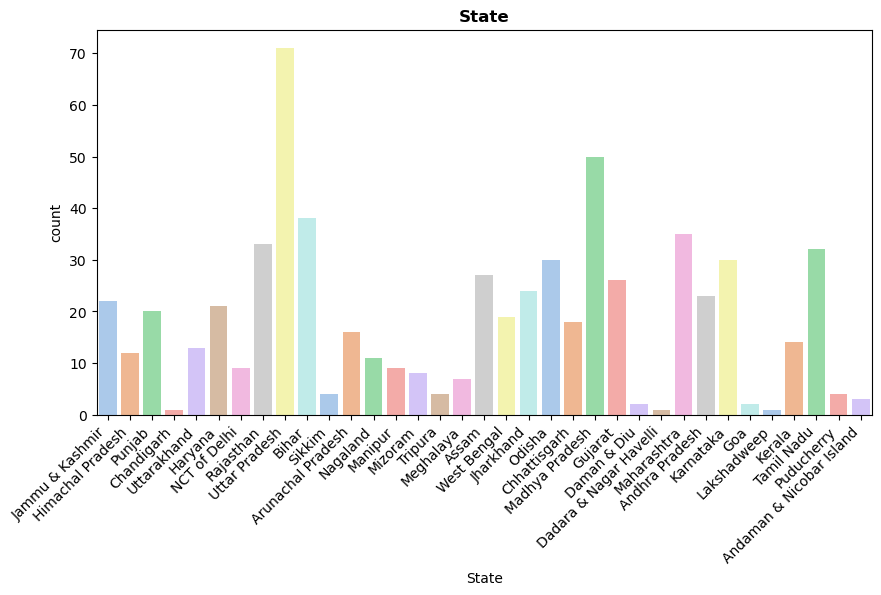

In [80]:
#Univariate & Bivariate Analysis(Considered 5 as per rubric)
plt.figure(figsize=(10,5))
sns.countplot(x='State',data=df1,palette='pastel');
plt.title('State',fontsize='large', loc='center',fontweight='bold');
plt.xticks(rotation=45, ha='right');

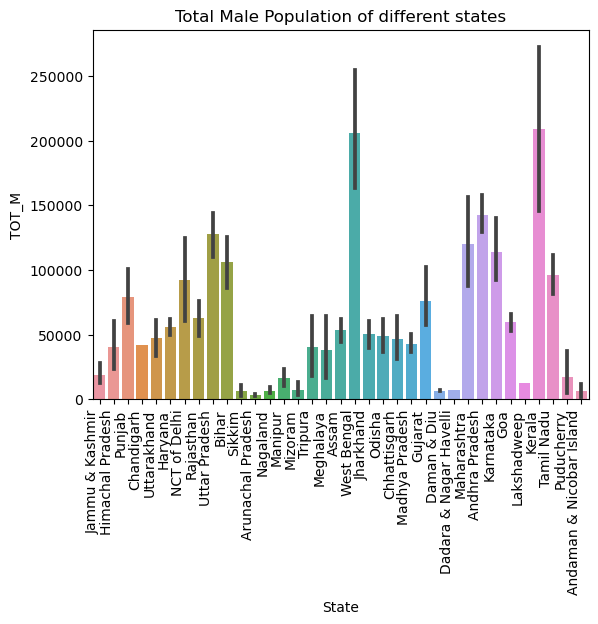

In [84]:
sns.barplot(x="State", y="TOT_M", data=df1).set(title= 'Total Male Population of different states');
plt.xticks(rotation=90, ha='right');

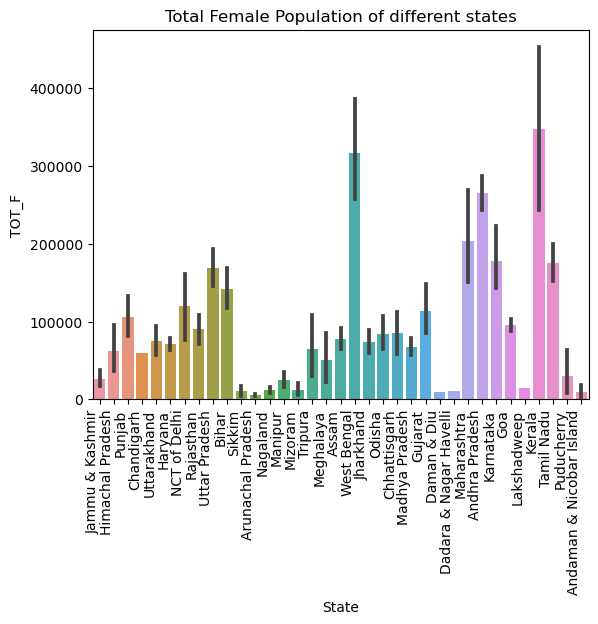

In [85]:
sns.barplot(x="State", y="TOT_F", data=df1).set(title= 'Total Female Population of different states');
plt.xticks(rotation=90, ha='right');

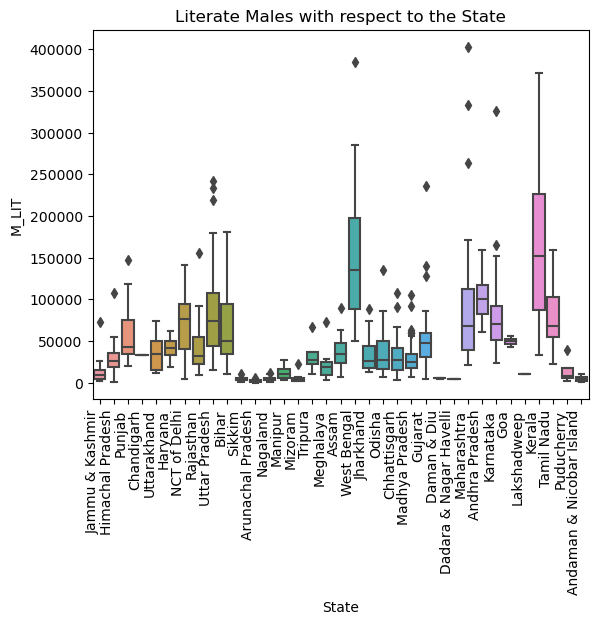

In [88]:
sns.boxplot(data=df1, x='State', y='M_LIT').set(title= 'Literate Males with respect to the State');
plt.xticks(rotation=90, ha='right');

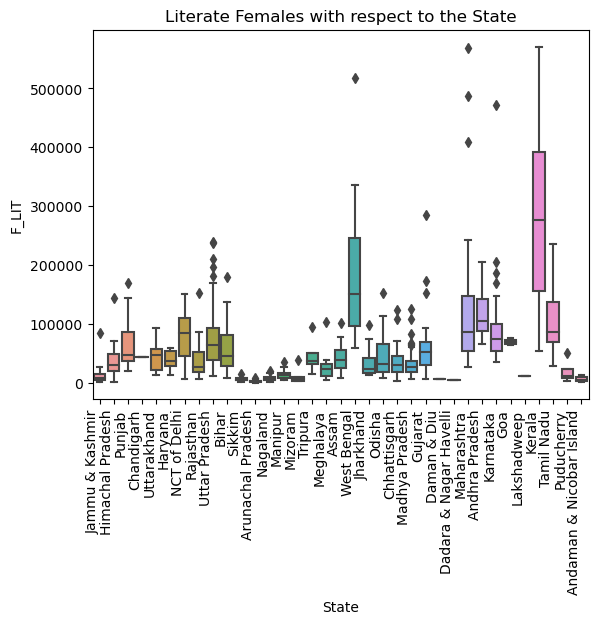

In [89]:
sns.boxplot(data=df1, x='State', y='F_LIT').set(title= 'Literate Females with respect to the State');
plt.xticks(rotation=90, ha='right');

In [94]:
df1.groupby(['State','Area Name','TOT_M'])['M_LIT'].sum().nlargest()

State        Area Name                   TOT_M 
Maharashtra  Mumbai Suburban             485417    403261
West Bengal  North Twenty Four Parganas  471482    384839
Kerala       Malappuram                  477790    371829
Maharashtra  Thane                       424759    332986
Karnataka    Bangalore                   401545    325690
Name: M_LIT, dtype: int64

## Data Scaling

In [52]:
num = []
cat = []
for i in df1.columns:
    if df1[i].dtype == 'object':
        cat.append(i)
    else:
            num.append(i)

In [53]:
data1 = df1[num]
data1

State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  \
0             1          1   7707  23388  29796  5862  6196     3     0  1999   
1             1          2   6218  19585  23102  4482  3733     7     6   427   
2             1          3   4452   6546  10964  1082  1018     3     6  5806   
3             1          4   1320   2784   4206   563   677     0     0  2666   
4             1          5  11654  20591  29981  5157  4587    20    33  7670   
..          ...        ...    ...    ...    ...   ...   ...   ...   ...   ...   
635          34        636   3333   8154  11781  1146  1203    21    30     0   
636          34        637  10612  12346  21691  1544  1533  2234  4155     0   
637          35        638   1275   1549   2630   227   225     0     0  1012   
638          35        639   3762   5200   8012   723   664     0     0    28   
639          35        640   7975  11977  18049  1470  1358     0     0   161   

     ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0    ...           1150            749            180            237   
1    ...            525            715            123            229   
2    ...            114            188             44             89   
3    ...            194            247             61            128   
4    ...            874           1928            465           1043   
..   ...            ...            ...            ...            ...   
635  ...             32             47              0              0   
636  ...            155            337              3             14   
637  ...            104            134              9              4   
638  ...            136            172             24             44   
639  ...            173            122              6              2   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0              680            252             32             46         258   
1              186            148             76            178         140   
2                3             34              0              4          67   
3               13             50              4             10         116   
4              205            302             24            105         180   
..             ...            ...            ...            ...         ...   
635              0              0              0              0          32   
636             38            130              4             23         110   
637              2              6             17             47          76   
638             11             21              1              4         100   
639             17             17              2              4         148   

     NON_WORK_F  
0           214  
1           160  
2            61  
3            59  
4           478  
..          ...  
635          47  
636         170  
637          77  
638         103  
639          99  

[640 rows x 59 columns]

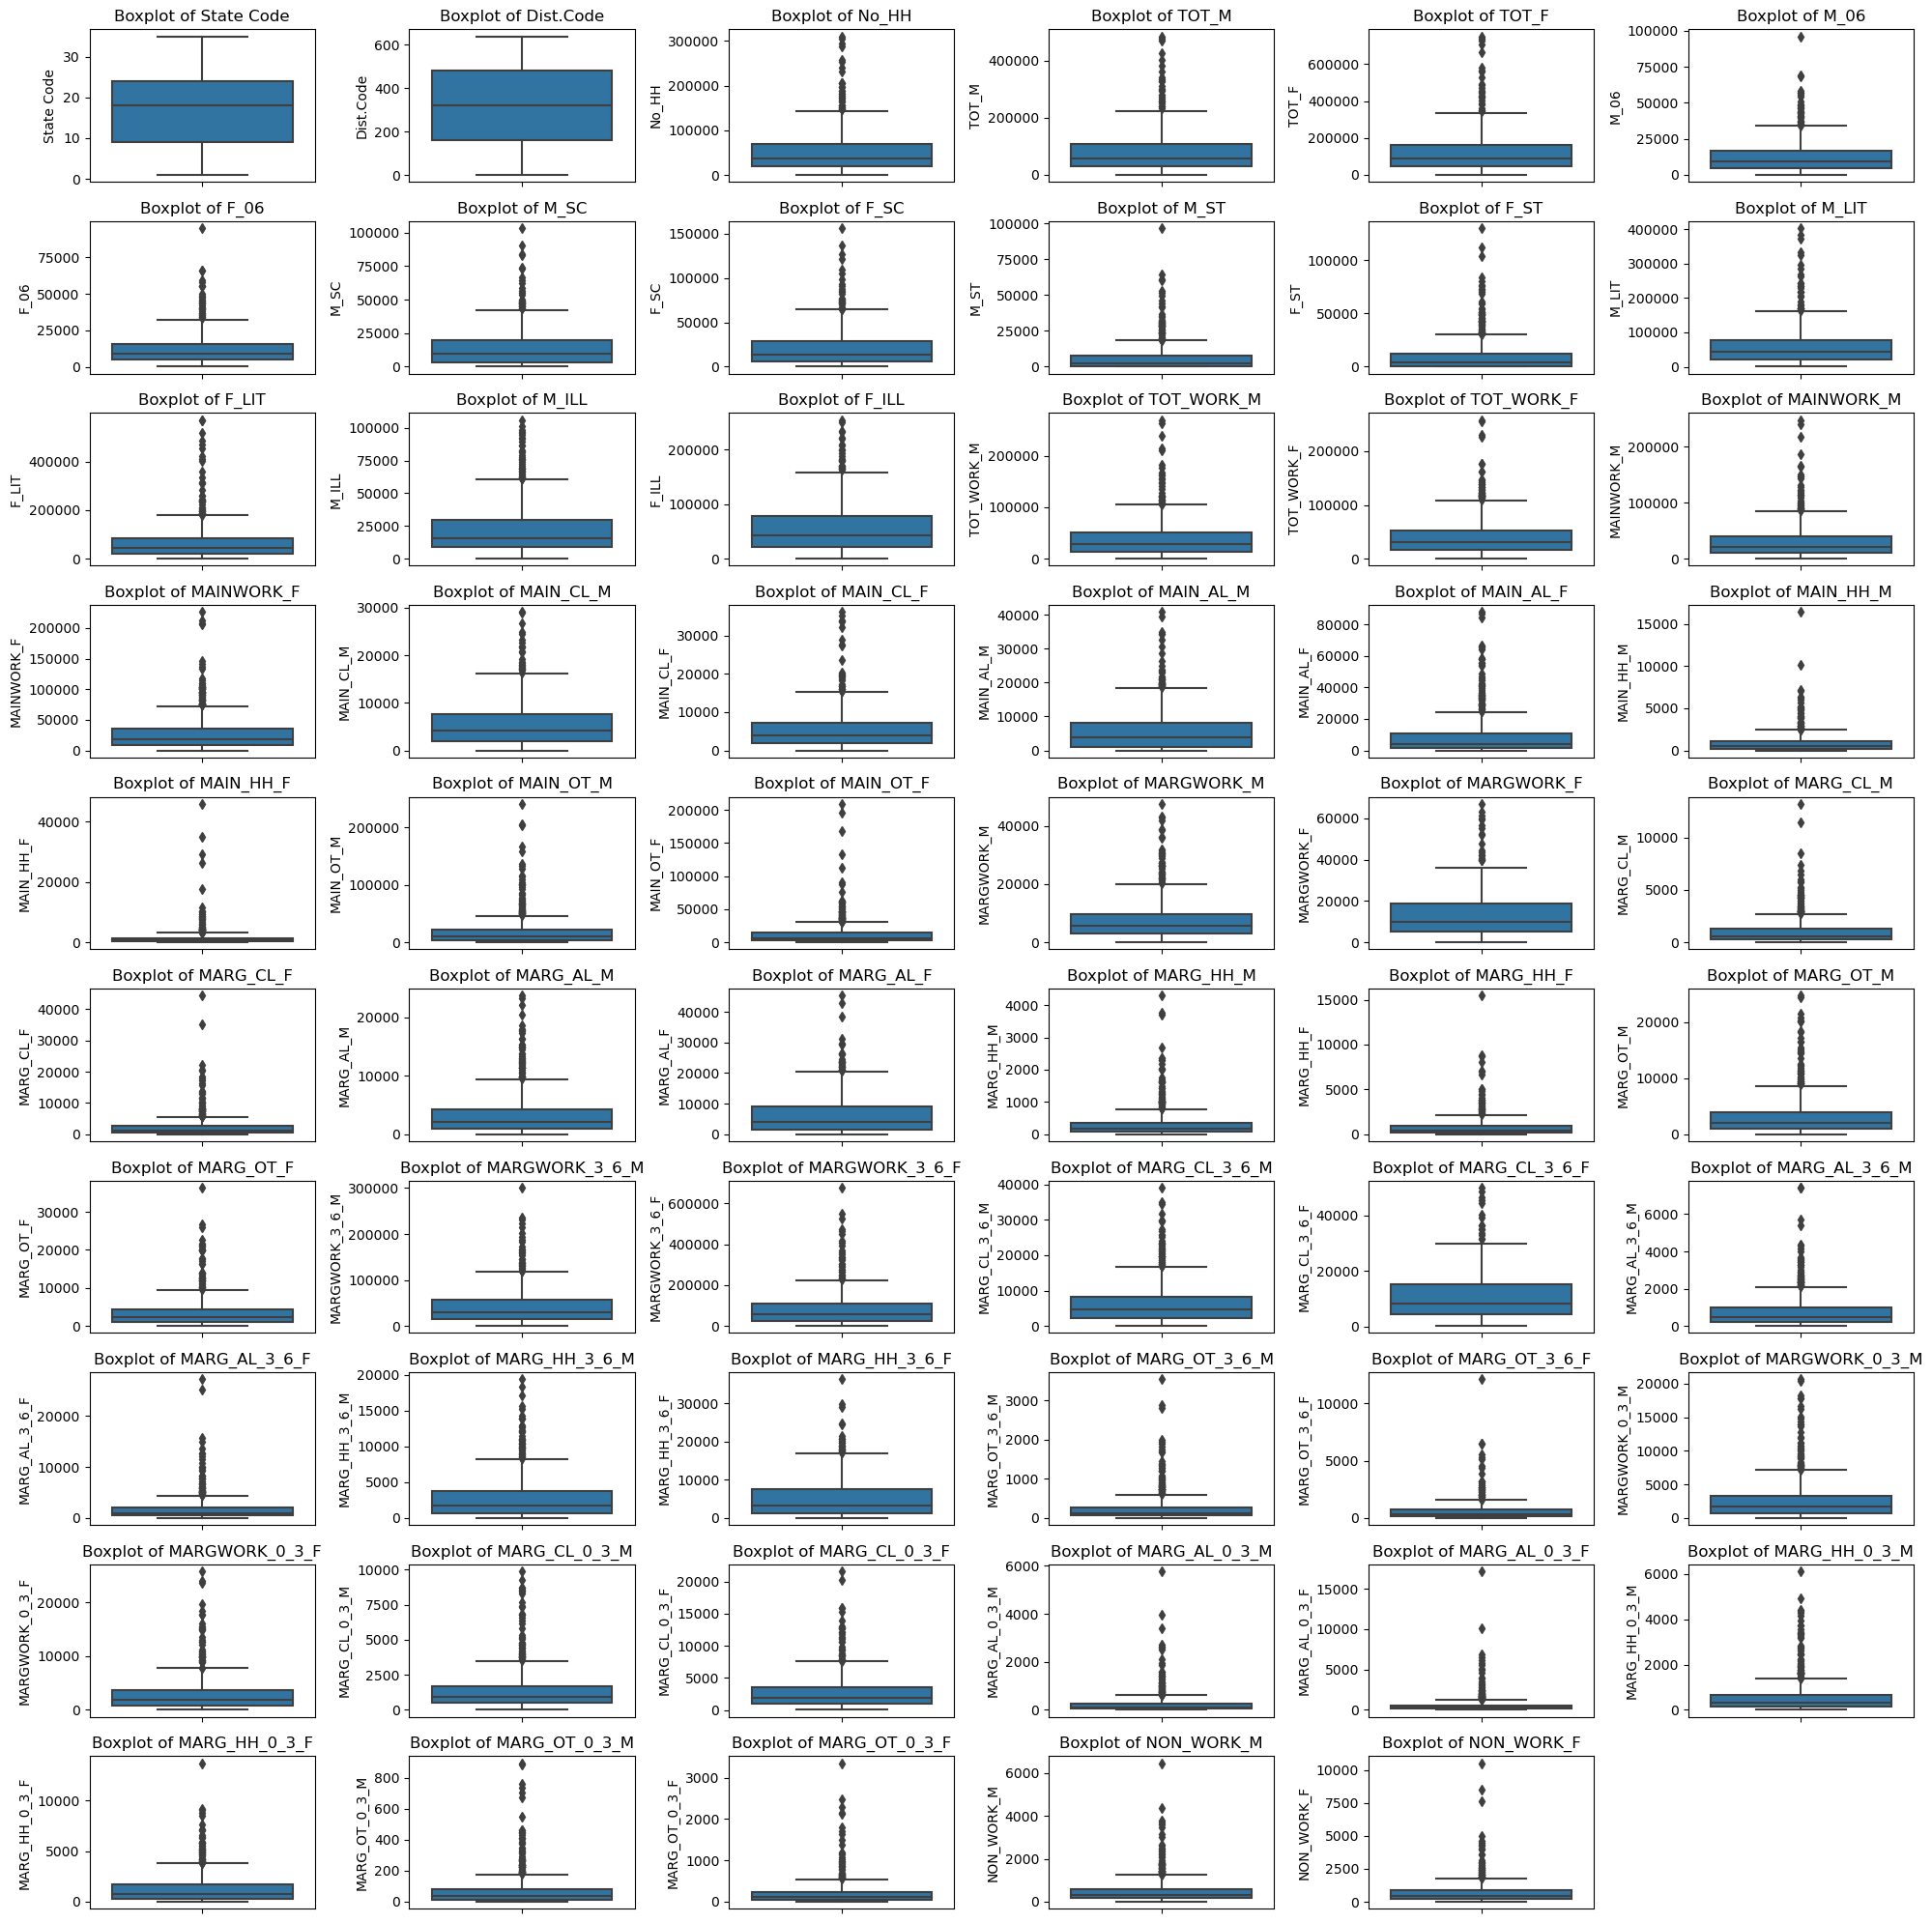

In [54]:
#Before Scaling
plt.figure(figsize = (20,20))
feature_list1 = data1.columns
for i in range(len(feature_list1)):
    plt.subplot(10, 6, i + 1)
    sns.boxplot(y = data1[feature_list1[i]], data = data1)
    plt.title('Boxplot of {}'.format(feature_list1[i]))
    plt.tight_layout()

In [55]:
from scipy.stats import zscore
df_num_scaled=data1.apply(zscore)
df_num_scaled.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738   
1   -1.710782  -1.723934 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367   
2   -1.710782  -1.718521 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262   
3   -1.710782  -1.713109 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393   
4   -1.710782  -1.707696 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.958575 -0.957049 -0.423306  ...      -0.163229      -0.720610   
1 -0.958297 -0.956772 -0.582014  ...      -0.583103      -0.732811   
2 -0.958575 -0.956772 -0.038951  ...      -0.859212      -0.921931   
3 -0.958783 -0.957049 -0.355965  ...      -0.805468      -0.900758   
4 -0.957395 -0.955529  0.149238  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 59 columns]

In [242]:
df_num_scaled.describe()

State Code   Dist.Code         No_HH         TOT_M         TOT_F  \
count  6.400000e+02  640.000000  6.400000e+02  6.400000e+02  6.400000e+02   
mean   8.881784e-17    0.000000  4.440892e-17 -8.881784e-17 -4.440892e-17   
std    1.000782e+00    1.000782  1.000782e+00  1.000782e+00  1.000782e+00   
min   -1.710782e+00   -1.729347 -1.057697e+00 -1.084858e+00 -1.071906e+00   
25%   -8.614460e-01   -0.864673 -6.598822e-01 -6.779559e-01 -6.682499e-01   
50%    9.405736e-02    0.000000 -3.198873e-01 -2.945918e-01 -3.052330e-01   
75%    7.310596e-01    0.864673  3.673585e-01  3.815493e-01  3.689451e-01   
max    1.898897e+00    1.729347  5.389586e+00  5.529690e+00  5.532633e+00   

               M_06          F_06          M_SC          F_SC          M_ST  \
count  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean  -5.551115e-17  6.661338e-17  5.551115e-18 -5.551115e-17 -4.440892e-17   
std    1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00  1.000782e+00   
min   -1.066236e+00 -1.050264e+00 -9.587827e-01 -9.570486e-01 -6.251244e-01   
25%   -6.591892e-01 -6.423757e-01 -7.183230e-01 -6.989640e-01 -5.954674e-01   
50%   -2.741142e-01 -2.897563e-01 -2.934040e-01 -3.256148e-01 -3.895344e-01   
75%    3.664446e-01  3.498980e-01  3.890923e-01  3.869764e-01  1.480266e-01   
max    7.301993e+00  7.350309e+00  6.207800e+00  6.248040e+00  9.146281e+00   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...   6.400000e+02   6.400000e+02   6.400000e+02   6.400000e+02   
mean   ...  -2.775558e-17  -5.551115e-17   2.220446e-17  -2.220446e-17   
std    ...   1.000782e+00   1.000782e+00   1.000782e+00   1.000782e+00   
min    ...  -9.331095e-01  -9.786309e-01  -5.538606e-01  -4.997437e-01   
25%    ...  -6.069516e-01  -6.458774e-01  -4.501038e-01  -4.021408e-01   
50%    ...  -2.982605e-01  -2.975134e-01  -3.010914e-01  -2.781223e-01   
75%    ...   2.156650e-01   3.024119e-01   4.384484e-02   9.537836e-03   
max    ...   5.698208e+00   6.765940e+00   1.219498e+01   1.485974e+01   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count   6.400000e+02   6.400000e+02   6.400000e+02     640.000000   
mean    4.440892e-17  -1.110223e-17  -2.775558e-17       0.000000   
std     1.000782e+00   1.000782e+00   1.000782e+00       1.000782   
min    -7.358309e-01  -8.164885e-01  -6.620676e-01      -0.648604   
25%    -5.566930e-01  -6.283737e-01  -5.322134e-01      -0.509670   
50%    -3.316224e-01  -3.638767e-01  -3.374323e-01      -0.283498   
75%     1.067076e-01   2.634357e-01   7.068064e-02       0.126843   
max     7.290595e+00   7.840581e+00   7.639320e+00      10.188272   

         NON_WORK_M    NON_WORK_F  
count  6.400000e+02  6.400000e+02  
mean  -2.220446e-17 -6.661338e-17  
std    1.000782e+00  1.000782e+00  
min   -8.359160e-01 -7.694115e-01  
25%   -5.720361e-01 -5.324676e-01  
50%   -3.016001e-01 -2.641877e-01  
75%    1.548630e-01  1.635209e-01  
max    9.745505e+00  1.080621e+01  

[8 rows x 59 columns]

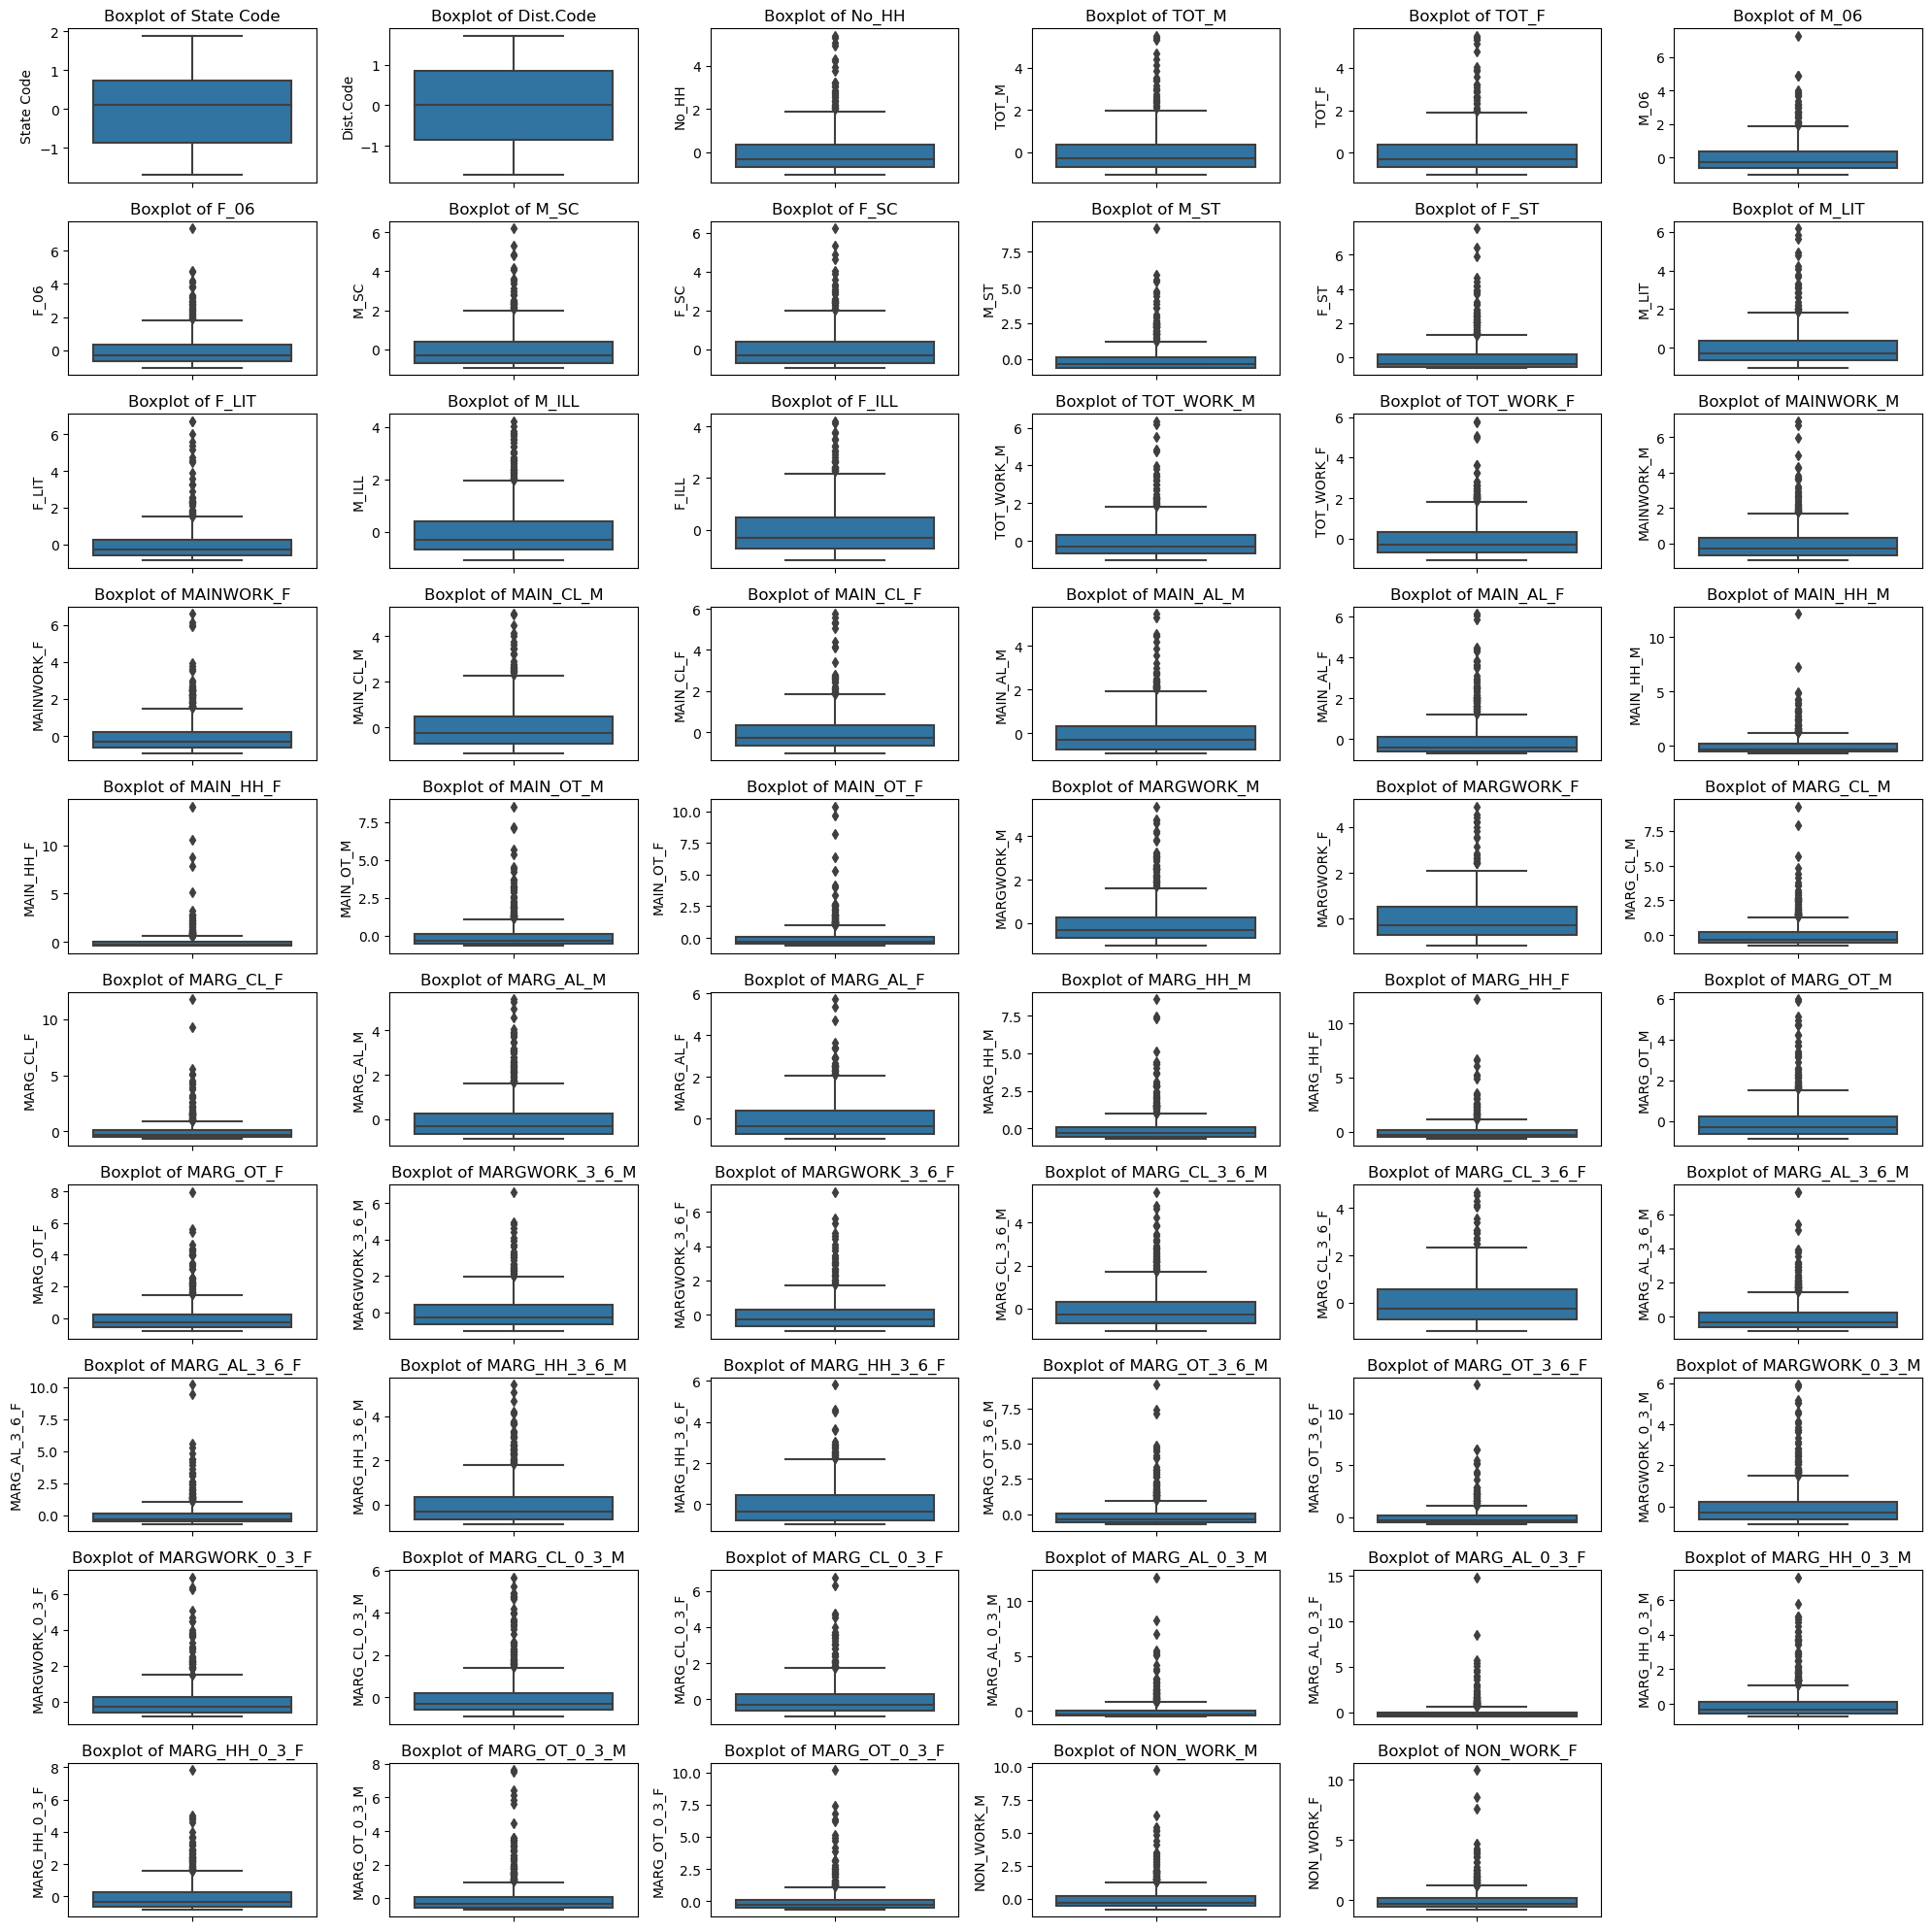

In [9]:
#After scaling
plt.figure(figsize = (20,20))
feature_list2 = df_num_scaled.columns
for i in range(len(feature_list2)):
    plt.subplot(10, 6, i + 1)
    sns.boxplot(y = df_num_scaled[feature_list2[i]], data = df_num_scaled)
    plt.title('Boxplot of {}'.format(feature_list2[i]))
    plt.tight_layout()

## Bartlett spherecity test and kmo model

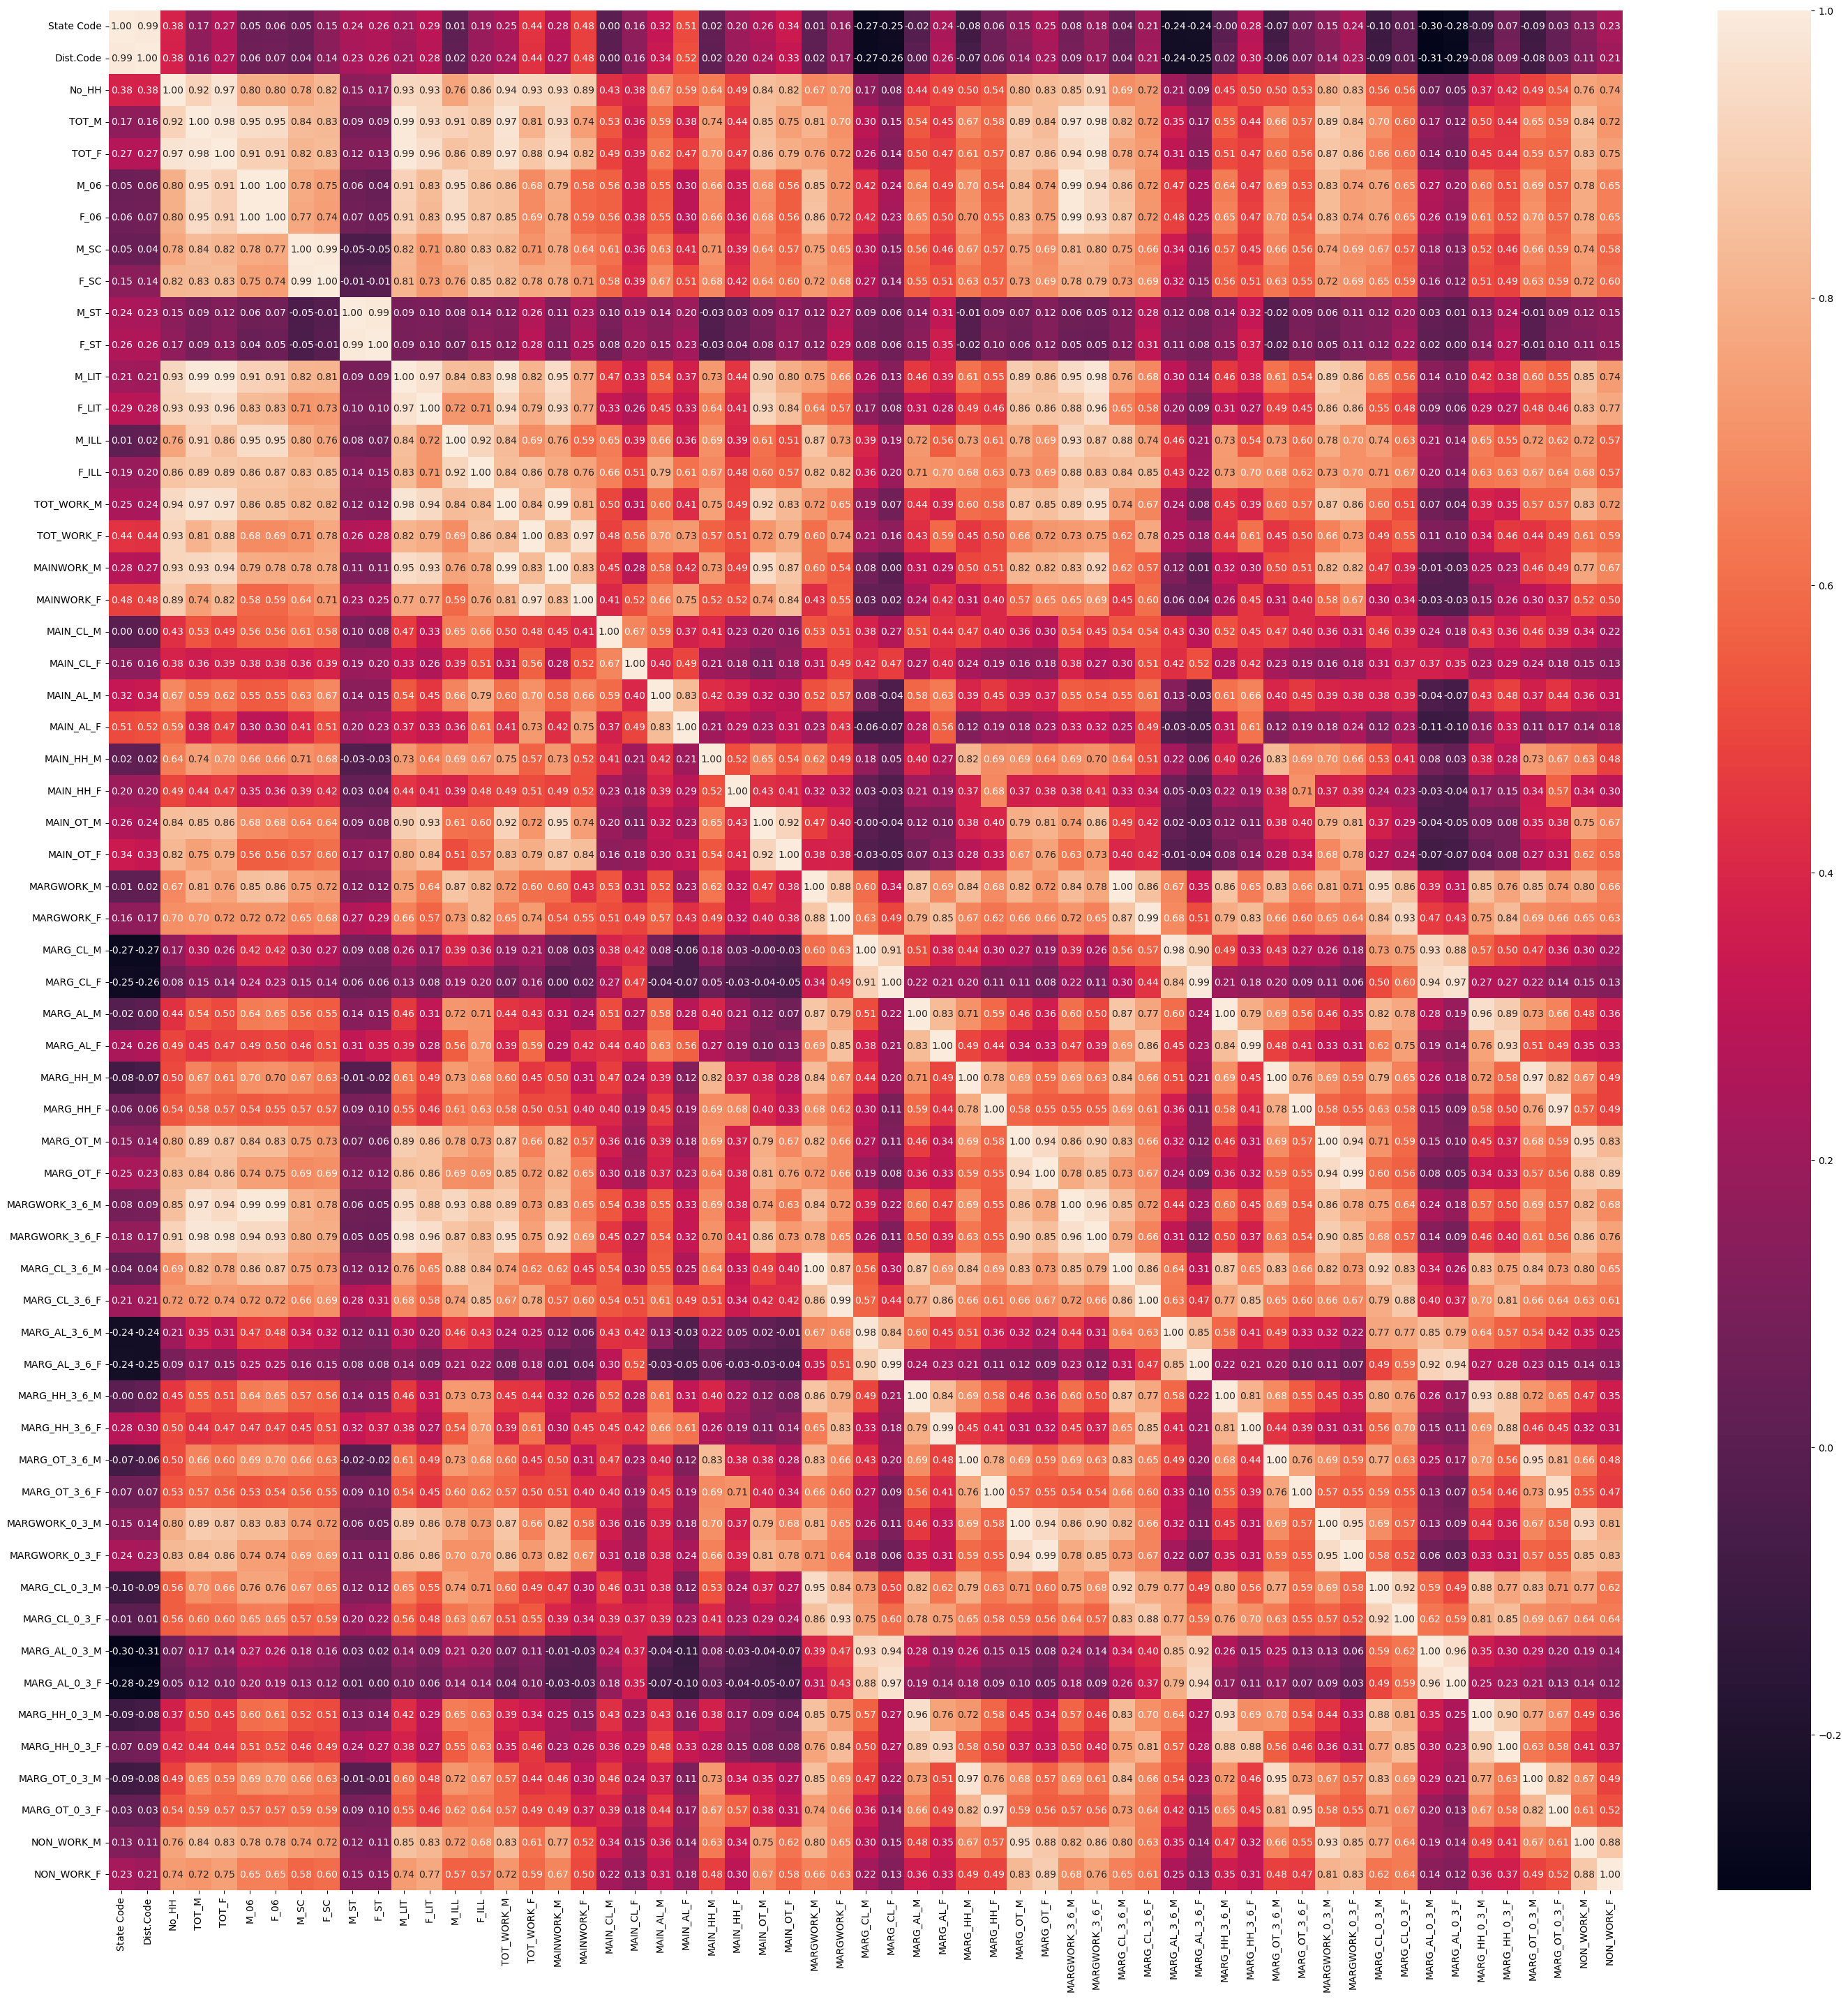

In [31]:
plt.figure(figsize=(35,35))
sns.heatmap(df_num_scaled.corr(),annot=True,fmt='.2f');

In [35]:
#Significance of correlation(should be less than 0.05)
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.8 kB 100.9 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 122.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requ

0.0

In [36]:
#Confirming sample adequancy(Above 0.7 is good)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8053442139018131

## Performing PCA

In [56]:
# PCA to all features
from sklearn.decomposition import PCA
pca = PCA(n_components=59, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose().round(2)

array([[-4.72, -4.87, -6.06, ..., -6.18, -6.11, -5.78],
       [ 0.72,  0.49,  0.23, ..., -1.22, -1.25, -1.5 ],
       [ 1.63,  1.75,  1.33, ..., -0.35, -0.28, -0.19],
       ...,
       [-0.  ,  0.  , -0.  , ...,  0.  , -0.  ,  0.  ],
       [ 0.  , -0.  ,  0.  , ...,  0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  ,  0.  , -0.  ]])

In [57]:
#Obtaining the Eigen Vectors 
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.03  0.03  0.16 ...  0.13  0.15  0.13]
 [-0.16 -0.16 -0.13 ...  0.05 -0.05 -0.07]
 [-0.25 -0.26 -0.03 ... -0.    0.13  0.09]
 ...
 [ 0.    0.   -0.   ...  0.03 -0.09  0.01]
 [ 0.   -0.   -0.   ...  0.   -0.05  0.03]
 [ 0.    0.   -0.   ... -0.05  0.05  0.04]]


In [58]:
#Checking eigen value(Total eigen value= no of PC We have)
pca.explained_variance_

array([3.18674263e+01, 8.18907061e+00, 4.54275124e+00, 3.84336785e+00,
       2.27105793e+00, 1.95992589e+00, 1.37548006e+00, 8.87342674e-01,
       7.19897963e-01, 6.14059555e-01, 4.94399686e-01, 4.24147991e-01,
       3.43932360e-01, 2.96118628e-01, 2.75961760e-01, 1.84995268e-01,
       1.28846861e-01, 1.11536962e-01, 1.03594789e-01, 9.73429345e-02,
       7.82132546e-02, 5.59614544e-02, 4.44214277e-02, 3.78654873e-02,
       2.96705436e-02, 2.70572400e-02, 2.34417688e-02, 1.43611558e-02,
       1.10964929e-02, 9.28775833e-03, 8.27176626e-03, 7.61344489e-03,
       5.02300148e-03, 4.49943614e-03, 2.51573519e-03, 1.06257176e-03,
       7.11882677e-04, 6.28474170e-30, 6.46518301e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
      

In [59]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.54 0.14 0.08 0.07 0.04 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


In [60]:
df_extracted_loadings= pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59'],index=df_num_scaled.columns)
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
State Code      0.030070 -0.162783 -0.250129  0.120049  0.145753  0.090244   
Dist.Code       0.030075 -0.158822 -0.259360  0.110852  0.136167  0.079450   
No_HH           0.156432 -0.128322 -0.033498  0.101335 -0.022504 -0.000996   
TOT_M           0.167038 -0.080861  0.063630  0.033299 -0.049227 -0.074100   
TOT_F           0.165702 -0.101111  0.024403  0.071948 -0.027928 -0.046350   
M_06            0.161871 -0.012753  0.070453  0.007703 -0.069415 -0.152284   
F_06            0.162266 -0.011674  0.063515  0.002417 -0.062113 -0.149228   
M_SC            0.151068 -0.035627  0.035345 -0.024603 -0.185394 -0.045912   
F_SC            0.151483 -0.047732 -0.009677  0.002284 -0.170823 -0.022720   
M_ST            0.027664  0.008893 -0.201756  0.142128  0.372538  0.110757   
F_ST            0.028656  0.009765 -0.220129  0.141942  0.378134  0.113572   
M_LIT           0.162029 -0.106709  0.078097  0.059904 -0.020783 -0.057182   
F_LIT           0.147118 -0.145649  0.094215  0.100907  0.048630 -0.054350   
M_ILL           0.161355  0.001625  0.015287 -0.045680 -0.123602 -0.113020   
F_ILL           0.165216 -0.011822 -0.091208  0.012765 -0.144783 -0.025193   
TOT_WORK_M      0.159989 -0.126024  0.049175  0.045020 -0.032683 -0.007646   
TOT_WORK_F      0.146485 -0.096165 -0.126155  0.163411 -0.059847  0.095055   
MAINWORK_M      0.146447 -0.168329  0.053223  0.070774 -0.052703  0.012353   
MAINWORK_F      0.124701 -0.161039 -0.119314  0.178748 -0.105471  0.115437   
MAIN_CL_M       0.102842  0.060784 -0.073732  0.033137 -0.309091  0.013372   
MAIN_CL_F       0.074639  0.072382 -0.121925  0.243959 -0.256183  0.118601   
MAIN_AL_M       0.113762 -0.045072 -0.241982 -0.009802 -0.244210 -0.021674   
MAIN_AL_F       0.074787 -0.083782 -0.313531  0.127309 -0.218172  0.024647   
MAIN_HH_M       0.131280 -0.061292  0.102102 -0.129012 -0.101784  0.191305   
MAIN_HH_F       0.083602 -0.081797 -0.024900 -0.072407 -0.087854  0.435306   
MAIN_OT_M       0.123790 -0.200258  0.132074  0.088178  0.057489  0.008424   
MAIN_OT_F       0.111499 -0.204434  0.062340  0.139951  0.067811  0.059567   
MARGWORK_M      0.164144  0.095729  0.015572 -0.079401  0.063268 -0.090051   
MARGWORK_F      0.155259  0.114062 -0.101195  0.065070  0.085309  0.006585   
MARG_CL_M       0.081470  0.270006  0.104666  0.162308  0.003914  0.046110   
MARG_CL_F       0.048411  0.245991  0.125646  0.285792 -0.030845  0.108823   
MARG_AL_M       0.128167  0.158405 -0.142069 -0.163558  0.001840 -0.142828   
MARG_AL_F       0.114462  0.117725 -0.290271 -0.024294  0.043303 -0.104573   
MARG_HH_M       0.140274  0.077559  0.064858 -0.212713 -0.017314  0.110801   
MARG_HH_F       0.127424  0.027744 -0.004157 -0.202932  0.026272  0.371880   
MARG_OT_M       0.155155 -0.077464  0.134472 -0.023379  0.128771 -0.066210   
MARG_OT_F       0.147414 -0.110153  0.099771  0.025422  0.175746 -0.012857   
MARGWORK_3_6_M  0.164714 -0.034426  0.073724  0.020593 -0.062035 -0.132136   
MARGWORK_3_6_F  0.161211 -0.095331  0.089963  0.025258 -0.011411 -0.106070   
MARG_CL_3_6_M   0.165090  0.079613  0.005016 -0.087699  0.054687 -0.096012   
MARG_CL_3_6_F   0.155618  0.090678 -0.123580  0.069215  0.064538  0.011578   
MARG_AL_3_6_M   0.092133  0.263962  0.076698  0.119702  0.013845  0.024471   
MARG_AL_3_6_F   0.050781  0.242794  0.111763  0.289092 -0.036385  0.108764   
MARG_HH_3_6_M   0.128189  0.150601 -0.153496 -0.159301 -0.011560 -0.144891   
MARG_HH_3_6_F   0.110911  0.100312 -0.309744 -0.005055  0.023618 -0.096166   
MARG_OT_3_6_M   0.139029  0.071923  0.066194 -0.212570 -0.022944  0.118916   
MARG_OT_3_6_F   0.124331  0.018344 -0.004905 -0.198779  0.015909  0.391537   
MARGWORK_0_3_M  0.154197 -0.081126  0.133891 -0.023934  0.118628 -0.065687   
MARGWORK_0_3_F  0.146412 -0.117213  0.099662  0.021101  0.149339 -0.003843   
MARG_CL_0_3_M   0.149445  0.154508  0.057198 -0.040609  0.093749 -0.059995   
MARG_CL_0_3_F   0.139705  0.174434 -0.02380

In [61]:
# finding the Cumulative Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 53.93  67.79  75.47  81.98  85.82  89.14  91.47  92.97  94.19  95.22
  96.06  96.78  97.36  97.86  98.33  98.64  98.86  99.05  99.22  99.39
  99.52  99.62  99.69  99.76  99.81  99.85  99.89  99.92  99.93  99.95
  99.96  99.98  99.99  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


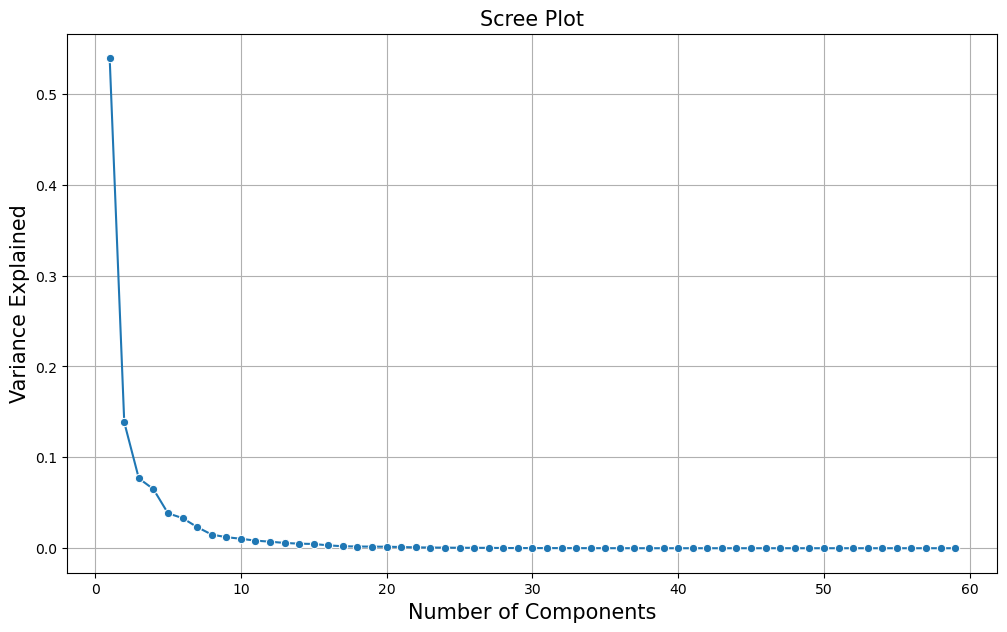

In [62]:
#Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()


In [63]:
#Fixed No of PCA=6 as it covers 90% explained variance
from sklearn.decomposition import PCA 
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose().round(2)

array([[-4.72, -4.87, -6.06, ..., -6.18, -6.11, -5.78],
       [ 0.72,  0.49,  0.23, ..., -1.22, -1.25, -1.5 ],
       [ 1.63,  1.75,  1.33, ..., -0.35, -0.28, -0.19],
       [-1.52, -1.94, -0.71, ..., -0.68, -0.42, -0.37],
       [ 0.09, -0.26,  0.15, ...,  0.91,  0.78,  0.85],
       [-0.61,  0.31, -0.02, ...,  0.55,  0.31,  0.25]])

In [64]:
df_pca.shape

(640, 6)

In [65]:
pca.components_.round(2)

array([[ 0.03,  0.03,  0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,
         0.03,  0.03,  0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,
         0.12,  0.1 ,  0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,
         0.16,  0.16,  0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,
         0.15,  0.16,  0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,
         0.14,  0.12,  0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,
         0.12,  0.14,  0.13,  0.15,  0.13],
       [-0.16, -0.16, -0.13, -0.08, -0.1 , -0.01, -0.01, -0.04, -0.05,
         0.01,  0.01, -0.11, -0.15,  0.  , -0.01, -0.13, -0.1 , -0.17,
        -0.16,  0.06,  0.07, -0.05, -0.08, -0.06, -0.08, -0.2 , -0.2 ,
         0.1 ,  0.11,  0.27,  0.25,  0.16,  0.12,  0.08,  0.03, -0.08,
        -0.11, -0.03, -0.1 ,  0.08,  0.09,  0.26,  0.24,  0.15,  0.1 ,
         0.07,  0.02, -0.08, -0.12,  0.15,  0.17,  0.25,  0.24,  0.18,
         0.17,  0.09,  0.05, -0.05, -0.07],
       [-0.25, -0.26, -0.03,  0.06,  0.02,  0.07,  0.06,  0.

In [44]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [45]:
#Checking the explained variance for each PC. 
pca.explained_variance_ratio_.round(2)

array([0.54, 0.14, 0.08, 0.07, 0.04, 0.03])

In [46]:
# Component loading when PC's are kept as 6
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_num_scaled))
df_pca_loading.shape

(6, 59)

In [47]:
df_pca_loading.head(5)


State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  \
0        0.03       0.03   0.16   0.17   0.17  0.16  0.16  0.15  0.15  0.03   
1       -0.16      -0.16  -0.13  -0.08  -0.10 -0.01 -0.01 -0.04 -0.05  0.01   
2       -0.25      -0.26  -0.03   0.06   0.02  0.07  0.06  0.04 -0.01 -0.20   
3        0.12       0.11   0.10   0.03   0.07  0.01  0.00 -0.02  0.00  0.14   
4        0.15       0.14  -0.02  -0.05  -0.03 -0.07 -0.06 -0.19 -0.17  0.37   

   ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  ...           0.15           0.14           0.05           0.04   
1  ...           0.15           0.17           0.25           0.24   
2  ...           0.06          -0.02           0.15           0.15   
3  ...          -0.04           0.05           0.23           0.27   
4  ...           0.09           0.14          -0.02          -0.02   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0           0.12           0.12           0.14           0.13        0.15   
1           0.18           0.17           0.09           0.05       -0.05   
2          -0.09          -0.20           0.06          -0.00        0.13   
3          -0.17          -0.09          -0.21          -0.21       -0.02   
4           0.06           0.11           0.00           0.06        0.17   

   NON_WORK_F  
0        0.13  
1       -0.07  
2        0.09  
3        0.04  
4        0.25  

[5 rows x 59 columns]

In [69]:
df_selected = df_extracted_loadings[['PC1','PC2','PC3','PC4','PC5','PC6']]
df_selected

PC1       PC2       PC3       PC4       PC5       PC6
State Code      0.030070 -0.162783 -0.250129  0.120049  0.145753  0.090244
Dist.Code       0.030075 -0.158822 -0.259360  0.110852  0.136167  0.079450
No_HH           0.156432 -0.128322 -0.033498  0.101335 -0.022504 -0.000996
TOT_M           0.167038 -0.080861  0.063630  0.033299 -0.049227 -0.074100
TOT_F           0.165702 -0.101111  0.024403  0.071948 -0.027928 -0.046350
M_06            0.161871 -0.012753  0.070453  0.007703 -0.069415 -0.152284
F_06            0.162266 -0.011674  0.063515  0.002417 -0.062113 -0.149228
M_SC            0.151068 -0.035627  0.035345 -0.024603 -0.185394 -0.045912
F_SC            0.151483 -0.047732 -0.009677  0.002284 -0.170823 -0.022720
M_ST            0.027664  0.008893 -0.201756  0.142128  0.372538  0.110757
F_ST            0.028656  0.009765 -0.220129  0.141942  0.378134  0.113572
M_LIT           0.162029 -0.106709  0.078097  0.059904 -0.020783 -0.057182
F_LIT           0.147118 -0.145649  0.094215  0.100907  0.048630 -0.054350
M_ILL           0.161355  0.001625  0.015287 -0.045680 -0.123602 -0.113020
F_ILL           0.165216 -0.011822 -0.091208  0.012765 -0.144783 -0.025193
TOT_WORK_M      0.159989 -0.126024  0.049175  0.045020 -0.032683 -0.007646
TOT_WORK_F      0.146485 -0.096165 -0.126155  0.163411 -0.059847  0.095055
MAINWORK_M      0.146447 -0.168329  0.053223  0.070774 -0.052703  0.012353
MAINWORK_F      0.124701 -0.161039 -0.119314  0.178748 -0.105471  0.115437
MAIN_CL_M       0.102842  0.060784 -0.073732  0.033137 -0.309091  0.013372
MAIN_CL_F       0.074639  0.072382 -0.121925  0.243959 -0.256183  0.118601
MAIN_AL_M       0.113762 -0.045072 -0.241982 -0.009802 -0.244210 -0.021674
MAIN_AL_F       0.074787 -0.083782 -0.313531  0.127309 -0.218172  0.024647
MAIN_HH_M       0.131280 -0.061292  0.102102 -0.129012 -0.101784  0.191305
MAIN_HH_F       0.083602 -0.081797 -0.024900 -0.072407 -0.087854  0.435306
MAIN_OT_M       0.123790 -0.200258  0.132074  0.088178  0.057489  0.008424
MAIN_OT_F       0.111499 -0.204434  0.062340  0.139951  0.067811  0.059567
MARGWORK_M      0.164144  0.095729  0.015572 -0.079401  0.063268 -0.090051
MARGWORK_F      0.155259  0.114062 -0.101195  0.065070  0.085309  0.006585
MARG_CL_M       0.081470  0.270006  0.104666  0.162308  0.003914  0.046110
MARG_CL_F       0.048411  0.245991  0.125646  0.285792 -0.030845  0.108823
MARG_AL_M       0.128167  0.158405 -0.142069 -0.163558  0.001840 -0.142828
MARG_AL_F       0.114462  0.117725 -0.290271 -0.024294  0.043303 -0.104573
MARG_HH_M       0.140274  0.077559  0.064858 -0.212713 -0.017314  0.110801
MARG_HH_F       0.127424  0.027744 -0.004157 -0.202932  0.026272  0.371880
MARG_OT_M       0.155155 -0.077464  0.134472 -0.023379  0.128771 -0.066210
MARG_OT_F       0.147414 -0.110153  0.099771  0.025422  0.175746 -0.012857
MARGWORK_3_6_M  0.164714 -0.034426  0.073724  0.020593 -0.062035 -0.132136
MARGWORK_3_6_F  0.161211 -0.095331  0.089963  0.025258 -0.011411 -0.106070
MARG_CL_3_6_M   0.165090  0.079613  0.005016 -0.087699  0.054687 -0.096012
MARG_CL_3_6_F   0.155618  0.090678 -0.123580  0.069215  0.064538  0.011578
MARG_AL_3_6_M   0.092133  0.263962  0.076698  0.119702  0.013845  0.024471
MARG_AL_3_6_F   0.050781  0.242794  0.111763  0.289092 -0.036385  0.108764
MARG_HH_3_6_M   0.128189  0.150601 -0.153496 -0.159301 -0.011560 -0.144891
MARG_HH_3_6_F   0.110911  0.100312 -0.309744 -0.005055  0.023618 -0.096166
MARG_OT_3_6_M   0.139029  0.071923  0.066194 -0.212570 -0.022944  0.118916
MARG_OT_3_6_F   0.124331  0.018344 -0.004905 -0.198779  0.015909  0.391537
MARGWORK_0_3_M  0.154197 -0.081126  0.133891 -0.023934  0.118628 -0.065687
MARGWORK_0_3_F  0.146412 -0.117213  0.099662  0.021101  0.149339 -0.003843
MARG_CL_0_3_M   0.149445  0.154508  0.057198 -0.040609  0.093749 -0.059995
MARG_CL_0_3_F   0.139705  0.174434 -0.023800  0.046423  0.140430 -0.009186
MARG_AL_0_3_M   0.051646  0.253834  0.149589  0.230440 -0.016334  0.084513
MARG_AL_0_3_F   0.040969  0.242224  0.151083  

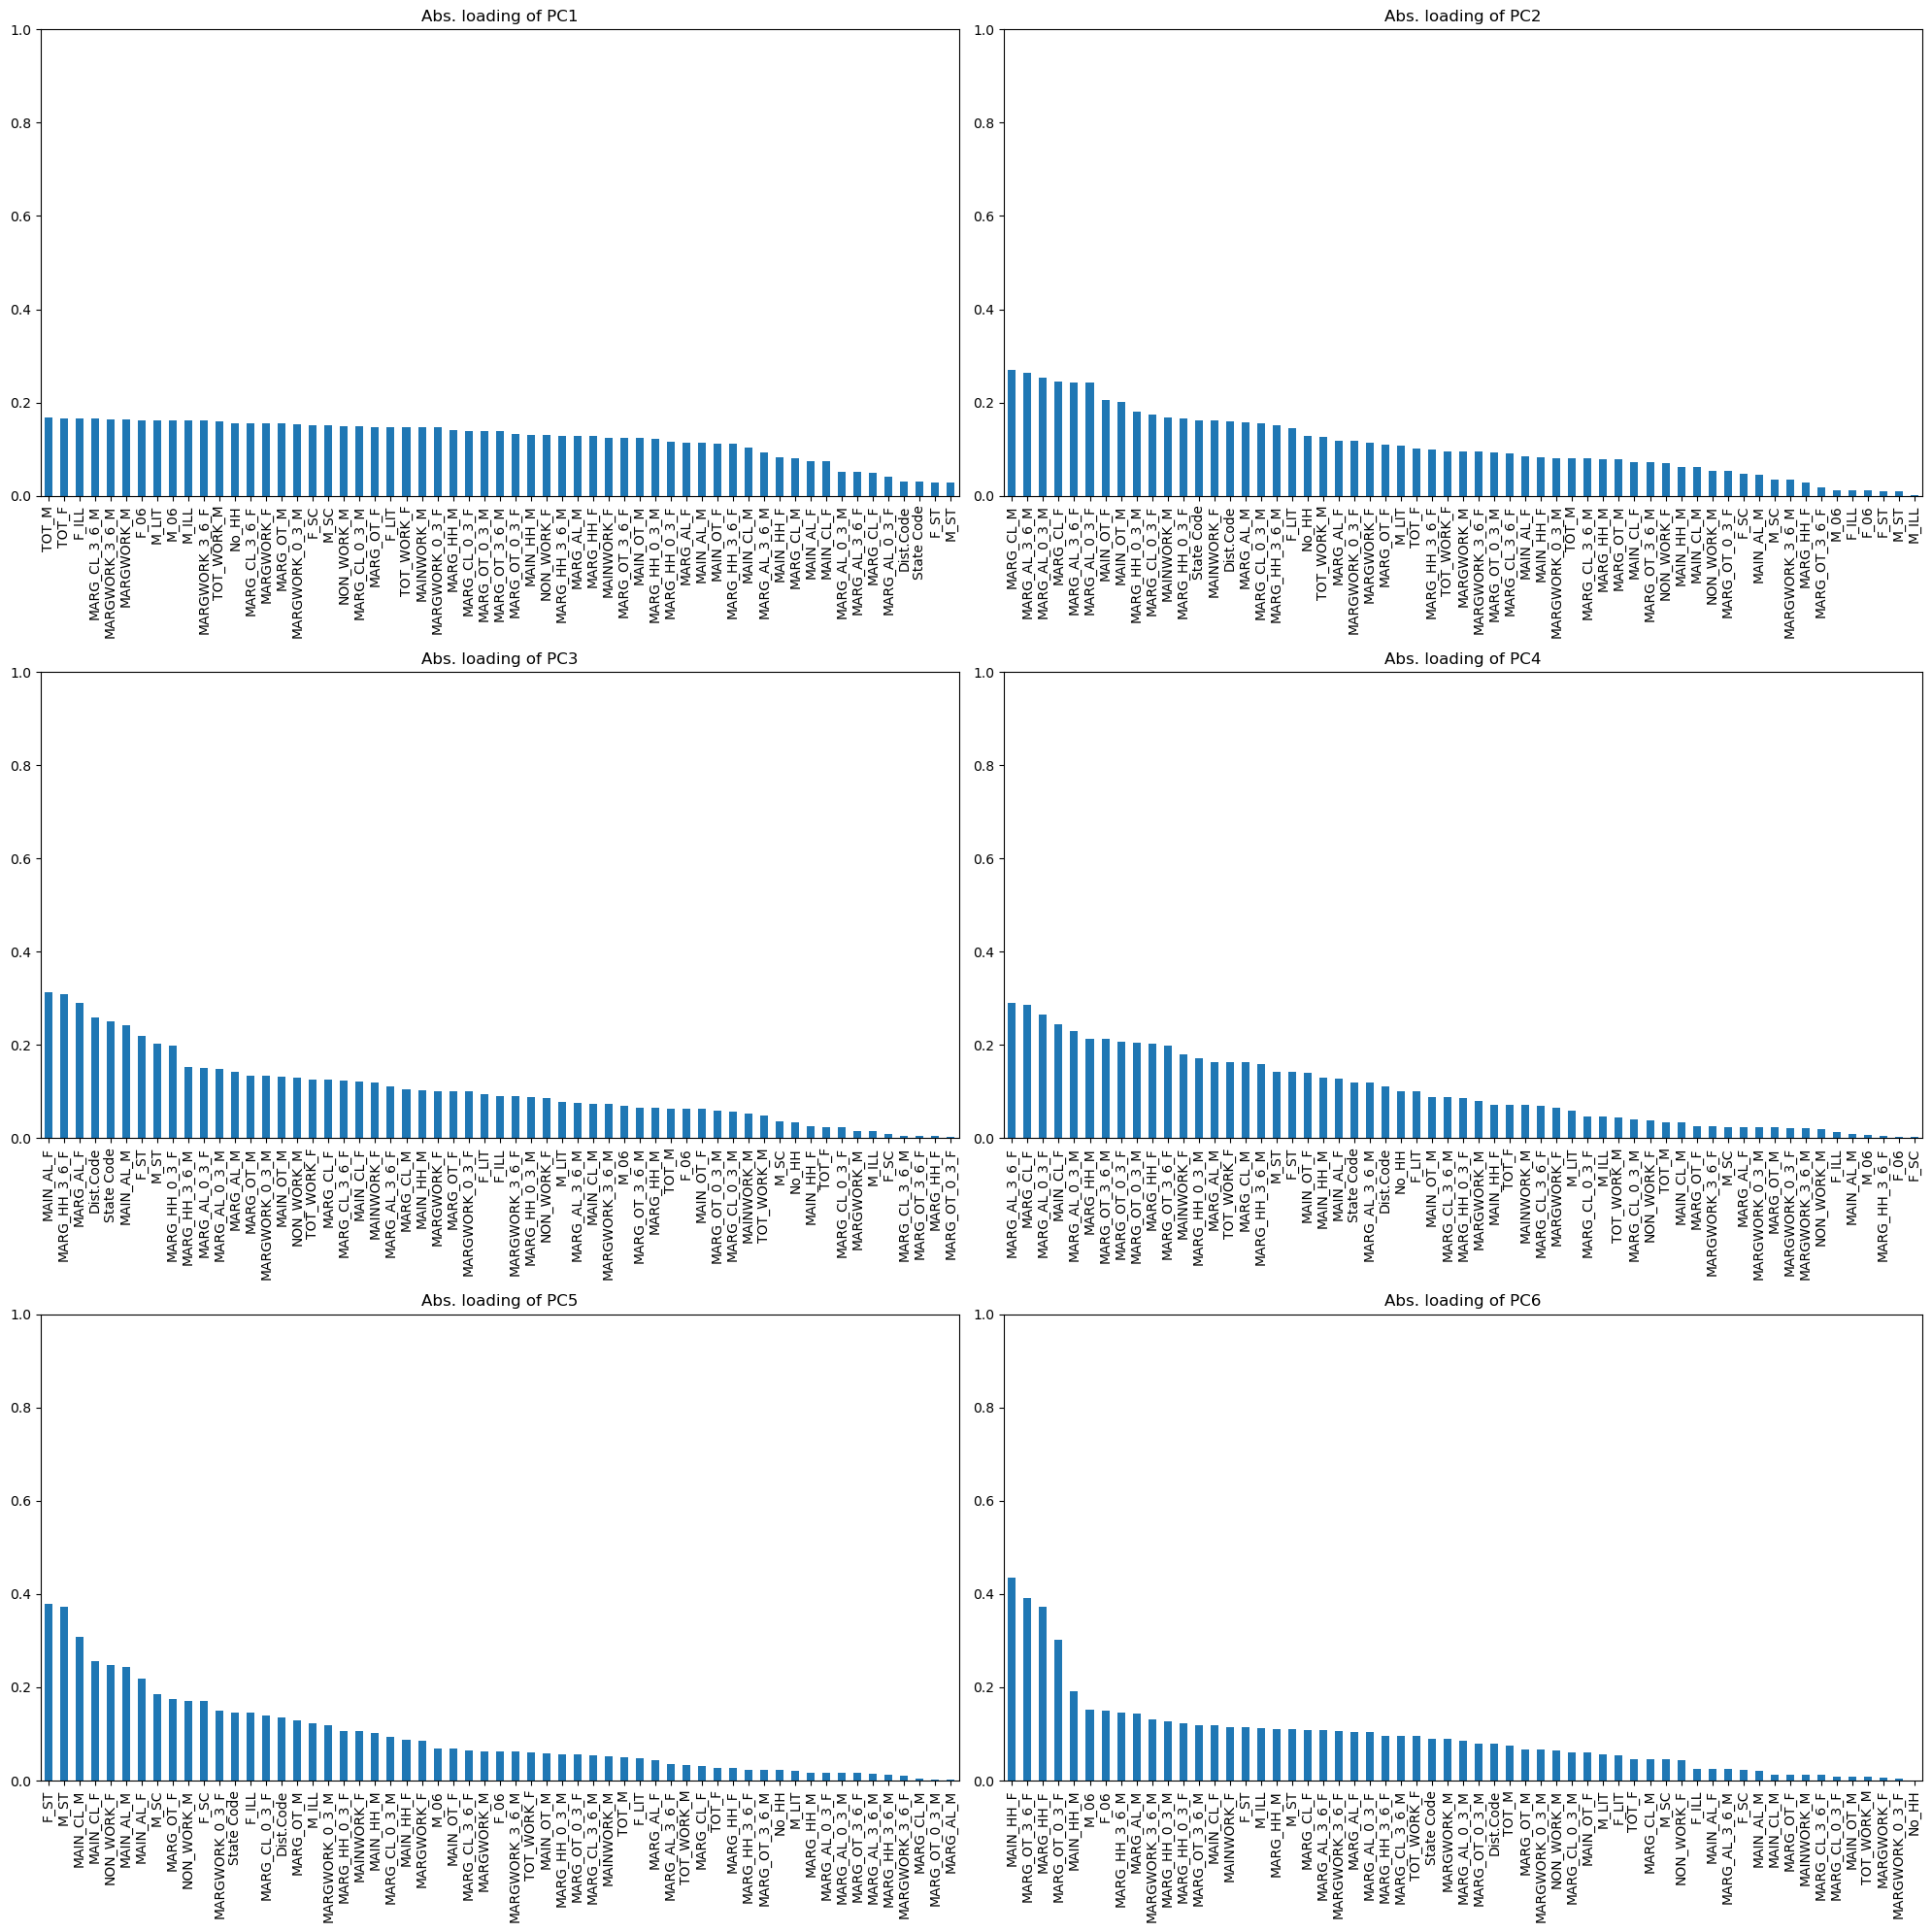

In [267]:
#checking how original feature matter to each PC
plt.figure(figsize=(20,20))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending=False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loading of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

<Axes: >

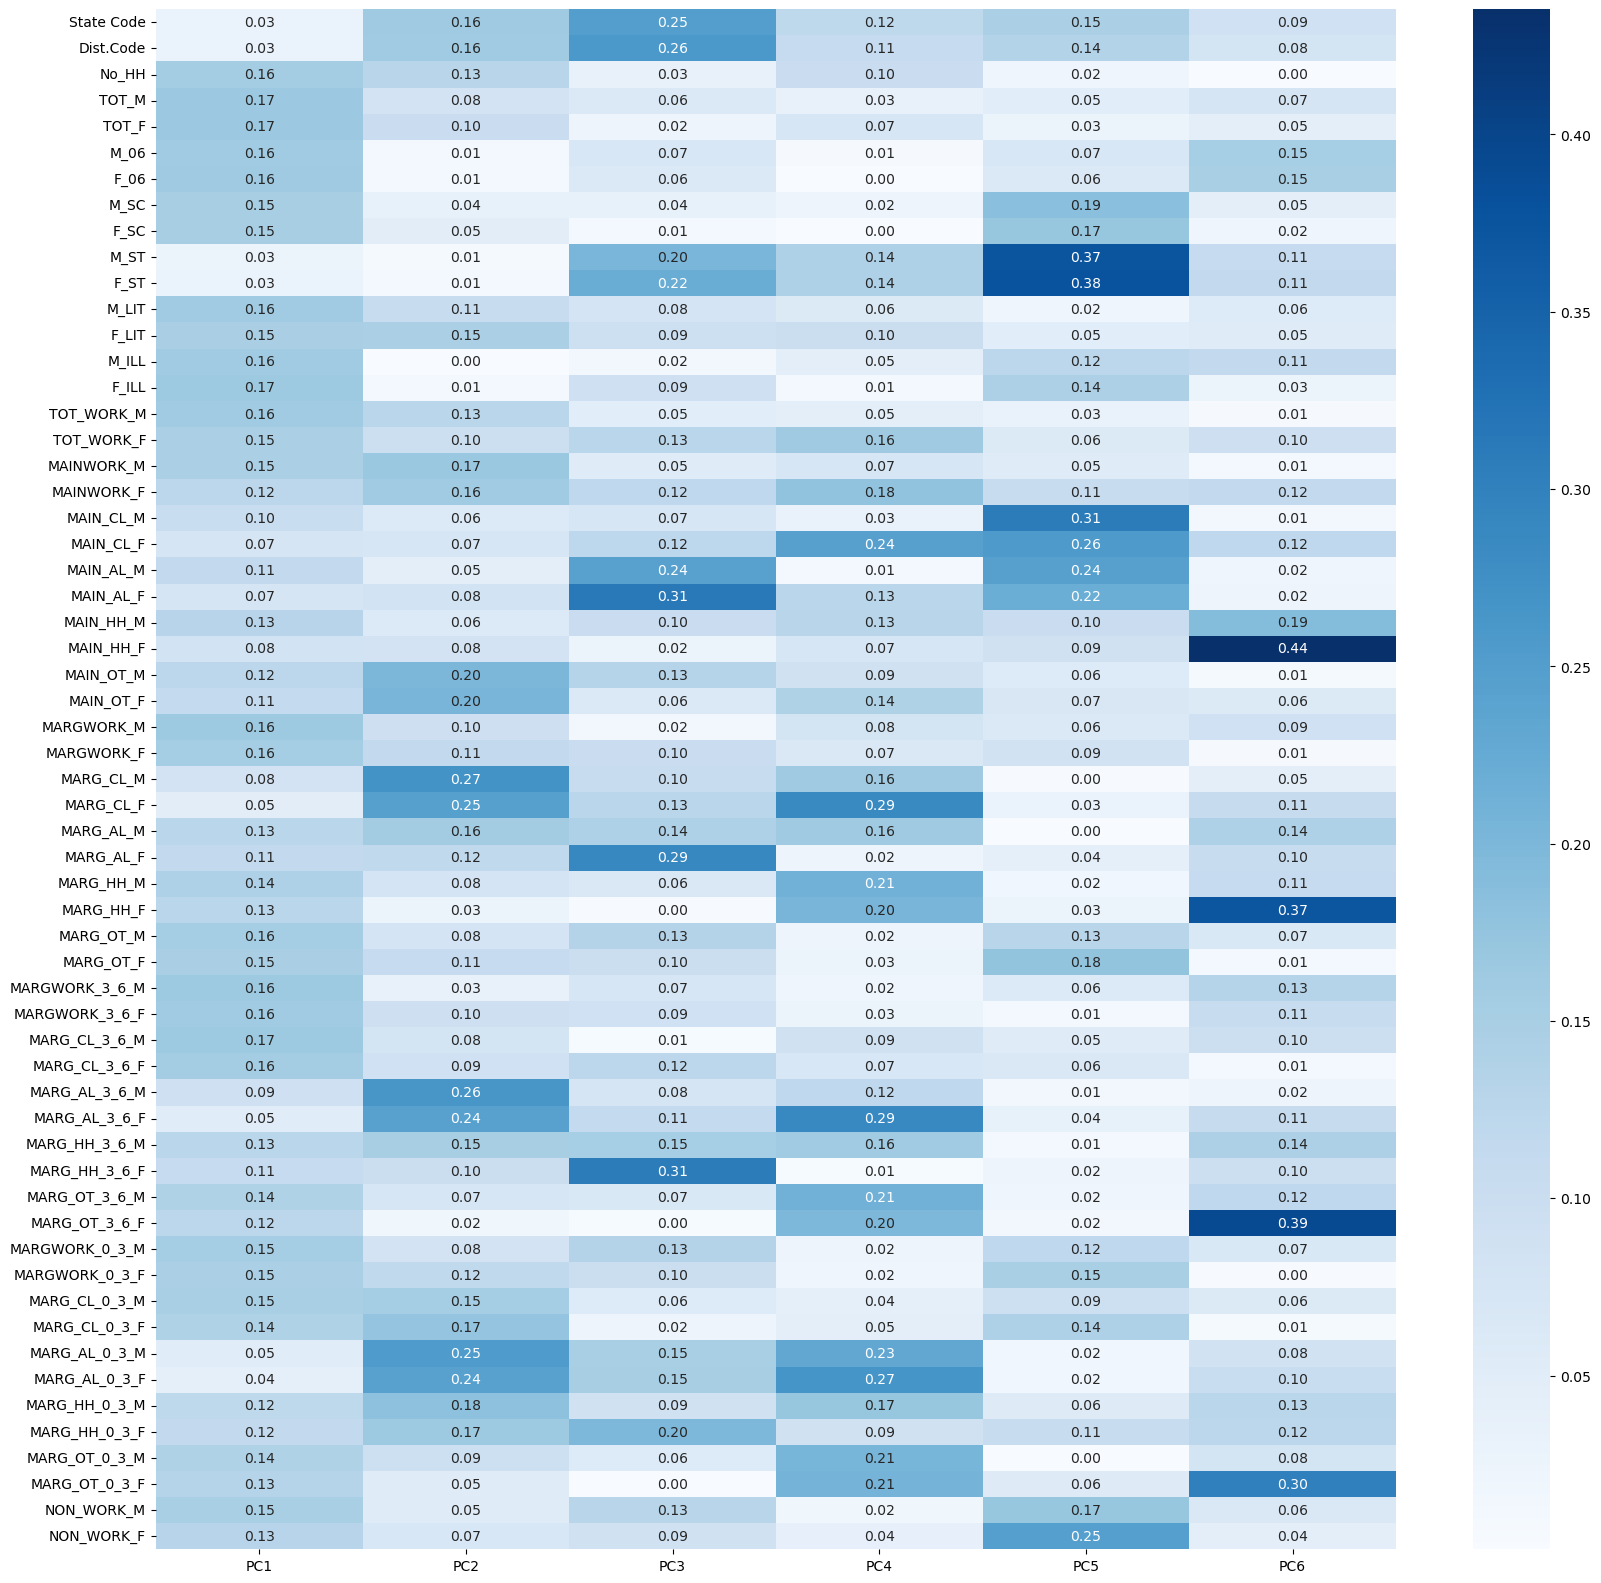

In [75]:
#comparing how original feature influence each PC-heatmap
plt.figure(figsize=(20,20))
sns.heatmap(abs(df_selected),annot=True,cmap='Blues',fmt='.2f')

In [77]:
#creating a dataframe
pca_final_df=pd.DataFrame(df_pca,columns=df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6
0 -4.719381  0.717504  1.632266 -1.524985  0.090263 -0.612570
1 -4.873297  0.492001  1.752127 -1.938533 -0.262972  0.305220
2 -6.062948  0.233751  1.333068 -0.710273  0.152175 -0.016516
3 -6.378387  0.042766  1.404373 -1.187673  0.013930 -0.177341
4 -4.581259  1.431602  1.722496 -0.231724  0.579570  0.058363
5 -3.429451  3.370505  2.725939  1.662328  0.711008  0.448845
6 -5.120804  0.230986  1.759261 -0.917210 -0.343366 -0.406717
7 -4.709479  0.602594  1.706348 -1.520299 -0.033920 -0.296549
8 -5.286297  0.506676  1.568661 -1.746379  0.037735  0.292447
9 -4.323849 -0.705453  2.108597 -1.356076  0.027937 -0.202572

<Axes: >

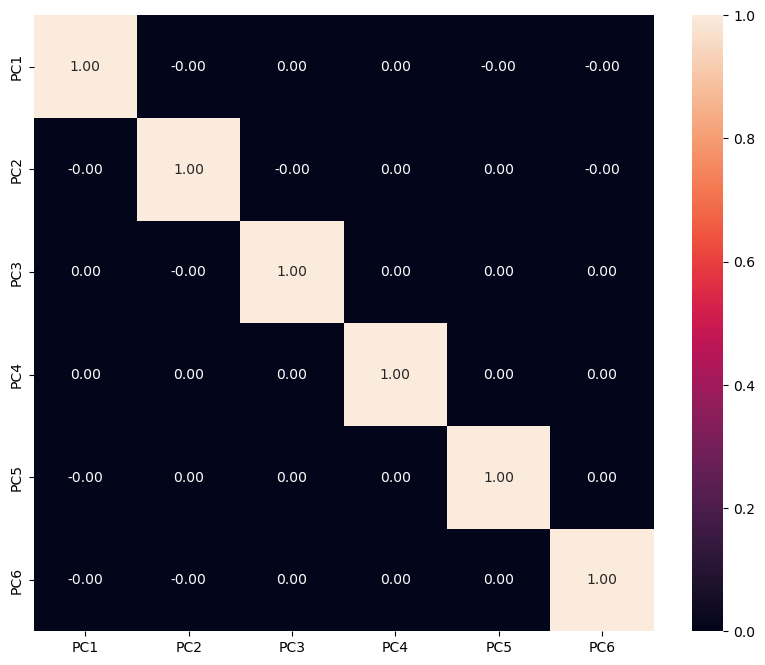

In [79]:
#Checking presence of corr among PCS's
plt.figure(figsize=(10,8))
sns.heatmap(pca_final_df.corr(),annot=True,fmt='.2f')